> Muhammad Haris Azaz Khan<br>332445<br>

> Muhammad Umar Asad <br>334420<br>

# **ML Project Lead Scoring**

## Importing Libraries

In [1]:
#Data Analysis & Data wrangling
import numpy as np
import pandas as pd
from collections import Counter

#Visualization
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
%matplotlib inline

# Plot Style
sns.set_context("paper")
style.use('fivethirtyeight')

# Machine Learning Libraries

#Sci-kit learn libraries
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import precision_score, recall_score, roc_curve, auc
from sklearn.metrics import roc_auc_score

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

from sklearn.model_selection import KFold

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import confusion_matrix

#statmodel libraries
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

from sklearn.ensemble import RandomForestClassifier

# libraries for oversampling
from sklearn.utils import resample


In [2]:
def calculate_percentages_confusion_matrix(confusion_matrix):
    true_positives = confusion_matrix[1][1]
    true_negatives = confusion_matrix[0][0]
    false_positives = confusion_matrix[0][1]
    false_negatives = confusion_matrix[1][0]
    
    total_samples = true_positives + true_negatives + false_positives + false_negatives
    
    true_positive_percentage = (true_positives / total_samples) * 100
    true_negative_percentage = (true_negatives / total_samples) * 100
    false_positive_percentage = (false_positives / total_samples) * 100
    false_negative_percentage = (false_negatives / total_samples) * 100
    
    sensitivity = (true_positives / (true_positives + false_negatives)) * 100
    specificity = (true_negatives / (true_negatives + false_positives)) * 100

    # Print the results
    print(f"True Positive Percentage: {true_positive_percentage}%")
    print(f"True Negative Percentage: {true_negative_percentage}%")
    print(f"False Positive Percentage: {false_positive_percentage}%")
    print(f"False Negative Percentage: {false_negative_percentage}%")
    print(f"Sensitivity (True Positive Rate): {sensitivity}%")
    print(f"Specificity (True Negative Rate): {specificity}%")


## **1. Data Exploration and Preprocessing**

### **Loading the Dataset**

In [3]:
import os

os.path.abspath(os.getcwd())

lead = pd.read_csv("Dataset/Lead Scoring.csv")

lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


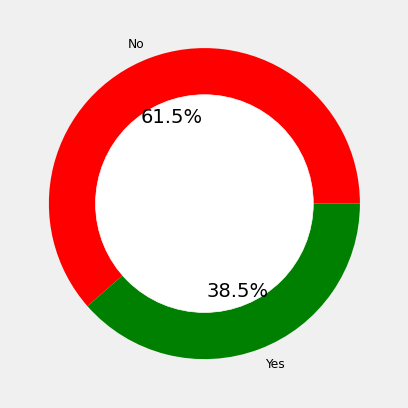

In [4]:
converted=lead['Converted'].value_counts().rename_axis('unique_values').to_frame('counts')
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(converted.counts, labels = ['No','Yes'],colors = ['red','green'],autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [5]:
lead.tail()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,...,No,Potential Lead,Mumbai,02.Medium,01.High,15.0,17.0,No,No,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,19.0,No,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,13.0,20.0,No,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,No,No,1,3.0,499,3.00,...,No,NaN,Other Metro Cities,02.Medium,02.Medium,15.0,16.0,No,No,SMS Sent
9239,571b5c8e-a5b2-4d57-8574-f2ffb06fdeff,579533,Landing Page Submission,Direct Traffic,No,No,1,6.0,1279,3.00,...,No,Potential Lead,Other Cities,02.Medium,01.High,15.0,18.0,No,Yes,Modified


### **Inspect Dataframe**

In [6]:
#database dimension
print("Database dimension     :",lead.shape)
print("Database size          :",lead.size)
print("Number of Row          :",len(lead.index))
print("Number of Columns      :",len(lead.columns))


Database dimension     : (9240, 37)
Database size          : 341880
Number of Row          : 9240
Number of Columns      : 37


In [7]:
#checking numerical columns statistics
lead.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [8]:
#info about the column types etc. 
print(lead.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [9]:
lead.columns.values.tolist()

['Prospect ID',
 'Lead Number',
 'Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Do Not Call',
 'Converted',
 'TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit',
 'Last Activity',
 'Country',
 'Specialization',
 'How did you hear about X Education',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Tags',
 'Lead Quality',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'Lead Profile',
 'City',
 'Asymmetrique Activity Index',
 'Asymmetrique Profile Index',
 'Asymmetrique Activity Score',
 'Asymmetrique Profile Score',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

In [10]:
attribute_list = lead.columns.values.tolist()
attribute_list.remove('Prospect ID')
attribute_list.remove('Lead Number')

for attribute in attribute_list:
    print(attribute,":",lead[attribute].unique())
    print("\n\n")

Lead Origin : ['API' 'Landing Page Submission' 'Lead Add Form' 'Lead Import'
 'Quick Add Form']



Lead Source : ['Olark Chat' 'Organic Search' 'Direct Traffic' 'Google' 'Referral Sites'
 'Welingak Website' 'Reference' 'google' 'Facebook' nan 'blog'
 'Pay per Click Ads' 'bing' 'Social Media' 'WeLearn' 'Click2call'
 'Live Chat' 'welearnblog_Home' 'youtubechannel' 'testone' 'Press_Release'
 'NC_EDM']



Do Not Email : ['No' 'Yes']



Do Not Call : ['No' 'Yes']



Converted : [0 1]



TotalVisits : [  0.   5.   2.   1.   4.   8.  11.   6.   3.   7.  13.  17.  nan   9.
  12.  10.  16.  14.  21.  15.  22.  19.  18.  20.  43.  30.  23.  55.
 141.  25.  27.  29.  24.  28.  26.  74.  41.  54. 115. 251.  32.  42.]



Total Time Spent on Website : [   0  674 1532 ...  603  483  927]



Page Views Per Visit : [ 0.    2.5   2.    1.    4.    8.    2.67 11.    5.    6.    3.    1.33
  1.5   3.5   7.    2.33 13.    8.5   5.5   1.67   nan  4.5   3.33 16.
 12.    1.71  1.8   6.5   4.33 14.    3.4  10.

### **Null Value Calculation**

In [11]:
lead = lead.replace("Select", np.nan)

# lead.tail

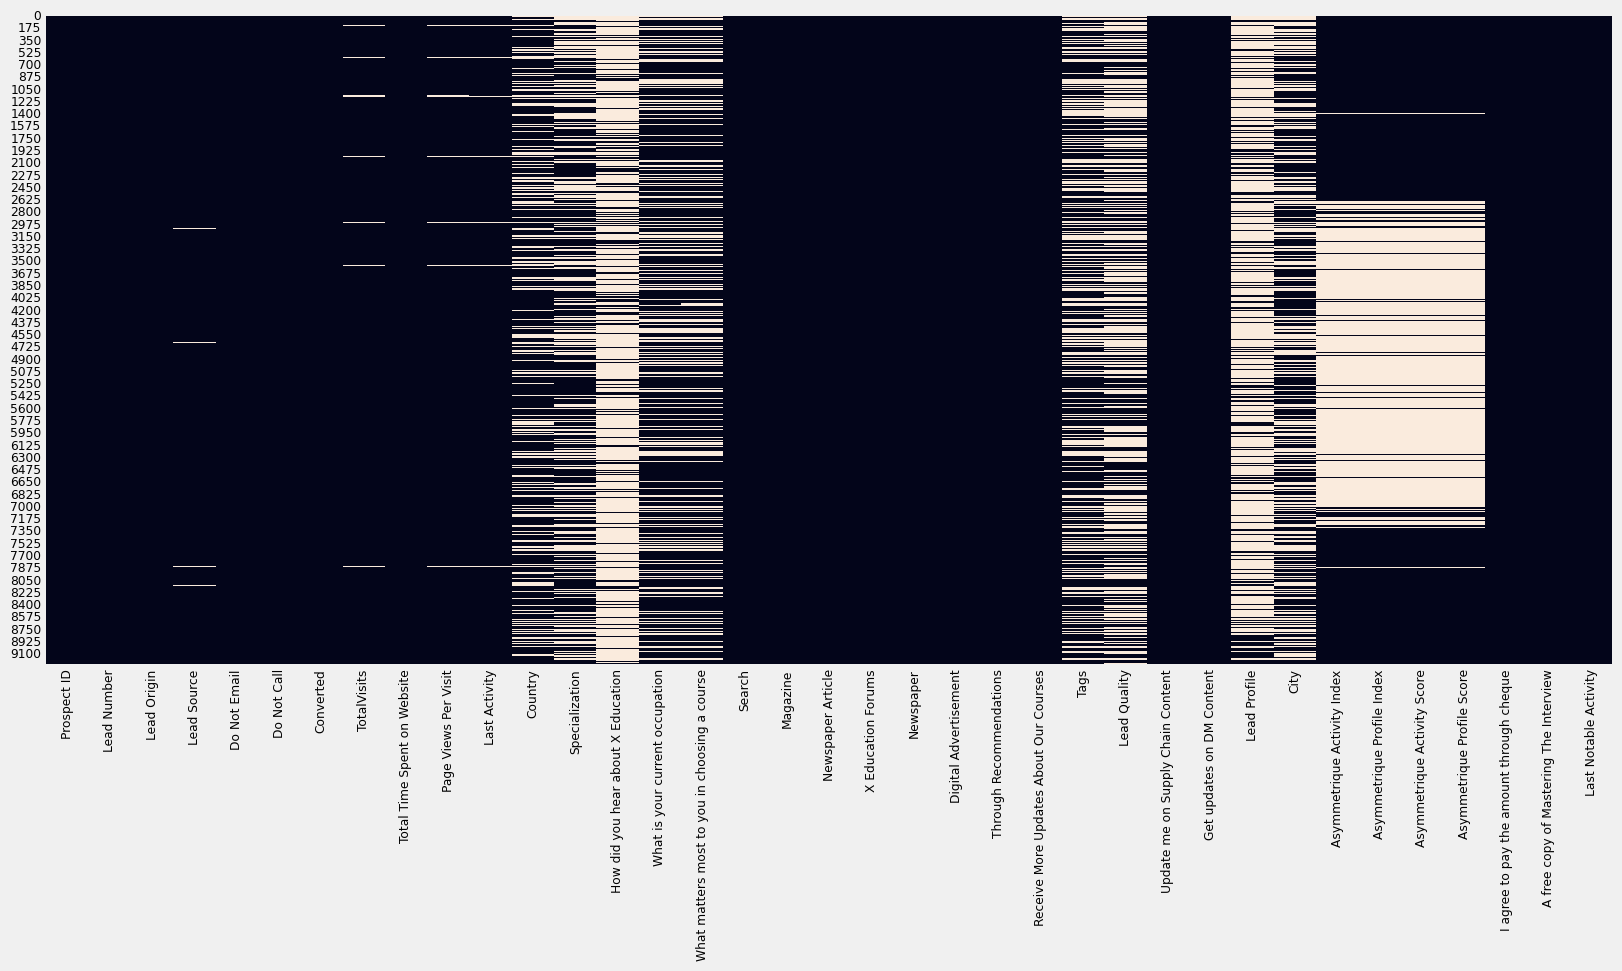

In [12]:
plt.figure(figsize = (18,8))
sns.heatmap(lead.isnull(),cbar = False)
plt.show()

### **Column wise Null Value calculation**

In [13]:
#Column wise null values in train data set 
null_perc = pd.DataFrame(round((lead.isnull().sum())*100/lead.shape[0],2)).reset_index()
null_perc.columns = ['Column Name', 'Null Values Percentage']
null_value = pd.DataFrame(lead.isnull().sum()).reset_index()
null_value.columns = ['Column Name', 'Null Values']
null_lead = pd.merge(null_value, null_perc, on='Column Name')
null_lead.sort_values("Null Values", ascending = False)


,Column Name,Null Values,Null Values Percentage
13,How did you hear about X Education,7250,78.46
28,Lead Profile,6855,74.19
25,Lead Quality,4767,51.59
33,Asymmetrique Profile Score,4218,45.65
32,Asymmetrique Activity Score,4218,45.65
30,Asymmetrique Activity Index,4218,45.65
31,Asymmetrique Profile Index,4218,45.65
29,City,3669,39.71
12,Specialization,3380,36.58
24,Tags,3353,36.29


### **Row wise Null Value calculation**

In [14]:
Row_Null50_Count = len(lead[lead.isnull().sum(axis=1)/lead.shape[1]>0.5])
print( 'Total number of rows with more than 50% null values are : ', Row_Null50_Count)

Total number of rows with more than 50% null values are :  0


### **Data Cleaning**

#### **Delete High Null Columns**

In [15]:
cols_to_drop = ['Prospect ID','Lead Number','How did you hear about X Education','Lead Profile',
                'Lead Quality','Asymmetrique Profile Score','Asymmetrique Activity Score',
               'Asymmetrique Activity Index','Asymmetrique Profile Index','Tags','Last Notable Activity']

lead.drop(cols_to_drop, 1, inplace = True)
len(lead.columns)

C:\Users\umara\AppData\Local\Temp\ipykernel_19376\1592367588.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  lead.drop(cols_to_drop, 1, inplace = True)


26

#### **Segregating Categorical & Numerical Values**

In [16]:
categorical_col = lead.select_dtypes(exclude =["number"]).columns.values
numerical_col = lead.select_dtypes(include =["number"]).columns.values
print("CATEGORICAL FEATURES : \n {} \n\n".format(categorical_col))
print("NUMERICAL FEATURES : \n {} ".format(numerical_col))

CATEGORICAL FEATURES : 
 ['Lead Origin' 'Lead Source' 'Do Not Email' 'Do Not Call' 'Last Activity'
 'Country' 'Specialization' 'What is your current occupation'
 'What matters most to you in choosing a course' 'Search' 'Magazine'
 'Newspaper Article' 'X Education Forums' 'Newspaper'
 'Digital Advertisement' 'Through Recommendations'
 'Receive More Updates About Our Courses'
 'Update me on Supply Chain Content' 'Get updates on DM Content' 'City'
 'I agree to pay the amount through cheque'
 'A free copy of Mastering The Interview'] 


NUMERICAL FEATURES : 
 ['Converted' 'TotalVisits' 'Total Time Spent on Website'
 'Page Views Per Visit'] 


#### **Categorical Columns Null Value Treatment**

In [17]:
# Checking unique values and null values for the categorical columns
def Cat_info(df, categorical_column):
    df_result = pd.DataFrame(columns=["columns","values","unique_values","null_values","null_percent"])
    
    df_temp=pd.DataFrame()
    for value in categorical_column:
        df_temp["columns"] = [value]
        df_temp["values"] = [df[value].unique()]
        df_temp["unique_values"] = df[value].nunique()
        df_temp["null_values"] = df[value].isna().sum()
        df_temp["null_percent"] = (df[value].isna().sum()/len(df)*100).round(1)
        df_result = df_result.append(df_temp)
    
    df_result.sort_values("null_values", ascending =False, inplace=True)
    df_result.set_index("columns", inplace=True)
    return df_result

In [18]:
df_cat = Cat_info(lead, categorical_col)
df_cat

C:\Users\umara\AppData\Local\Temp\ipykernel_19376\4126516813.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(df_temp)
C:\Users\umara\AppData\Local\Temp\ipykernel_19376\4126516813.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(df_temp)
C:\Users\umara\AppData\Local\Temp\ipykernel_19376\4126516813.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(df_temp)
C:\Users\umara\AppData\Local\Temp\ipykernel_19376\4126516813.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(df_temp)
C:\Users\umara\AppData\Local\Temp\ip

,values,unique_values,null_values,null_percent
columns,,,,
City,"[nan, Mumbai, Thane & Outskirts, Other Metro C...",6,3669,39.7
Specialization,"[nan, Business Administration, Media and Adver...",18,3380,36.6
What matters most to you in choosing a course,"[Better Career Prospects, nan, Flexibility & C...",3,2709,29.3
What is your current occupation,"[Unemployed, Student, nan, Working Professiona...",6,2690,29.1
Country,"[nan, India, Russia, Kuwait, Oman, United Arab...",38,2461,26.6
Last Activity,"[Page Visited on Website, Email Opened, Unreac...",17,103,1.1
Lead Source,"[Olark Chat, Organic Search, Direct Traffic, G...",21,36,0.4
Lead Origin,"[API, Landing Page Submission, Lead Add Form, ...",5,0,0.0
Digital Advertisement,"[No, Yes]",2,0,0.0


In [19]:
# Appending the columns to col_to_drop where only 1 category value is present

cols_to_drop = df_cat[df_cat['unique_values']==1].index.values.tolist() 
cols_to_drop

['I agree to pay the amount through cheque',
 'Get updates on DM Content',
 'Update me on Supply Chain Content',
 'Receive More Updates About Our Courses',
 'Magazine']

In [20]:
#dropping unnecessary columns

lead.drop(cols_to_drop, 1, inplace = True)
len(lead.columns)

C:\Users\umara\AppData\Local\Temp\ipykernel_19376\1701163962.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  lead.drop(cols_to_drop, 1, inplace = True)


21

In [21]:
categorical_col = lead.select_dtypes(exclude =["number"]).columns.values
new_cat = Cat_info(lead, categorical_col)
new_cat

C:\Users\umara\AppData\Local\Temp\ipykernel_19376\4126516813.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(df_temp)
C:\Users\umara\AppData\Local\Temp\ipykernel_19376\4126516813.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(df_temp)
C:\Users\umara\AppData\Local\Temp\ipykernel_19376\4126516813.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(df_temp)
C:\Users\umara\AppData\Local\Temp\ipykernel_19376\4126516813.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(df_temp)
C:\Users\umara\AppData\Local\Temp\ip

,values,unique_values,null_values,null_percent
columns,,,,
City,"[nan, Mumbai, Thane & Outskirts, Other Metro C...",6,3669,39.7
Specialization,"[nan, Business Administration, Media and Adver...",18,3380,36.6
What matters most to you in choosing a course,"[Better Career Prospects, nan, Flexibility & C...",3,2709,29.3
What is your current occupation,"[Unemployed, Student, nan, Working Professiona...",6,2690,29.1
Country,"[nan, India, Russia, Kuwait, Oman, United Arab...",38,2461,26.6
Last Activity,"[Page Visited on Website, Email Opened, Unreac...",17,103,1.1
Lead Source,"[Olark Chat, Organic Search, Direct Traffic, G...",21,36,0.4
X Education Forums,"[No, Yes]",2,0,0.0
Through Recommendations,"[No, Yes]",2,0,0.0


### **Outliers Treatment**

In [22]:
#Checking the detailed percentile values
lead.describe(percentiles=[.1,.5,.25,.75,.90,.95,.99])

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9103.000000,9240.000000,9103.000000
mean,0.385390,3.445238,487.698268,2.362820
std,0.486714,4.854853,548.021466,2.161418
min,0.000000,0.000000,0.000000,0.000000
10%,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,12.000000,1.000000
50%,0.000000,3.000000,248.000000,2.000000
75%,1.000000,5.000000,936.000000,3.000000
90%,1.000000,7.000000,1380.000000,5.000000
95%,1.000000,10.000000,1562.000000,6.000000


In [23]:
numerical_col

array(['Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit'], dtype=object)

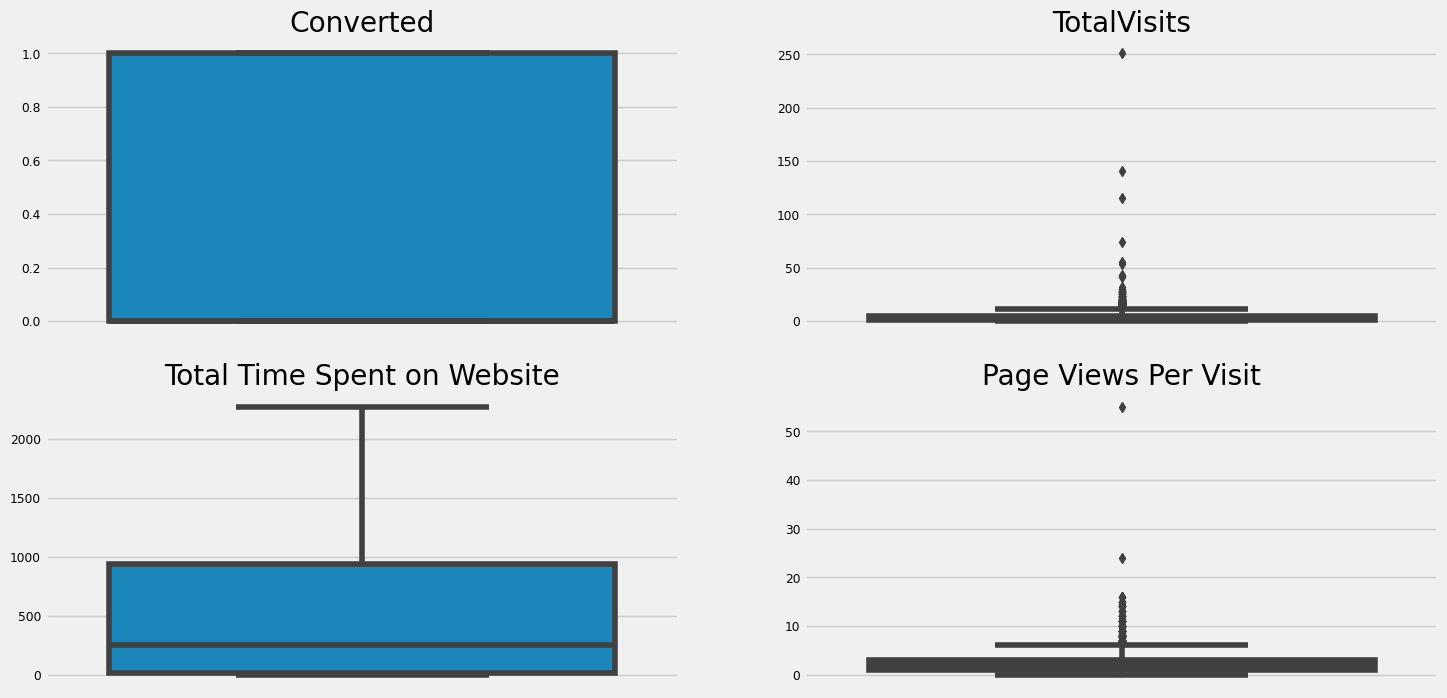

In [24]:
#Plotting the numerical columns for outlier values
i=1
plt.figure(figsize=[16,8])
for col in numerical_col:
    plt.subplot(2,2,i)
    sns.boxplot(y=lead[col])
    plt.title(col)
    plt.ylabel('')
    i+=1

**Explanation:**
In order to avoid potential issues with misclassification and inaccurate inferences when using Logistic Regression, it may be advisable to cap the values of TotalVisits and Page Views Per Visit at their 95th percentile. While these outliers may represent valid data points, they can heavily influence the model and lead to incorrect predictions. Additionally, the 95th and 99th percentiles are very similar in this dataset, so capping at the 95th percentile should have a similar impact as capping at the 99th percentile. This approach can help ensure that the model is more accurate and reliable in making predictions.


In [25]:
#Capping the data at 95% percetile value
Q4 = lead['TotalVisits'].quantile(0.95) # Get 95th quantile
print("Total number of rows getting capped for TotalVisits column : ",len(lead[lead['TotalVisits'] >= Q4]))
lead.loc[lead['TotalVisits'] >= Q4, 'TotalVisits'] = Q4 # outlier capping

Q4 = lead['Page Views Per Visit'].quantile(0.95) # Get 95th quantile
print("Total number of rows getting capped for Page Views Per Visit column : ",len(lead[lead['Page Views Per Visit'] >= Q4]))
lead.loc[lead['Page Views Per Visit'] >= Q4, 'Page Views Per Visit'] = Q4 # outlier capping

Total number of rows getting capped for TotalVisits column :  467
Total number of rows getting capped for Page Views Per Visit column :  604


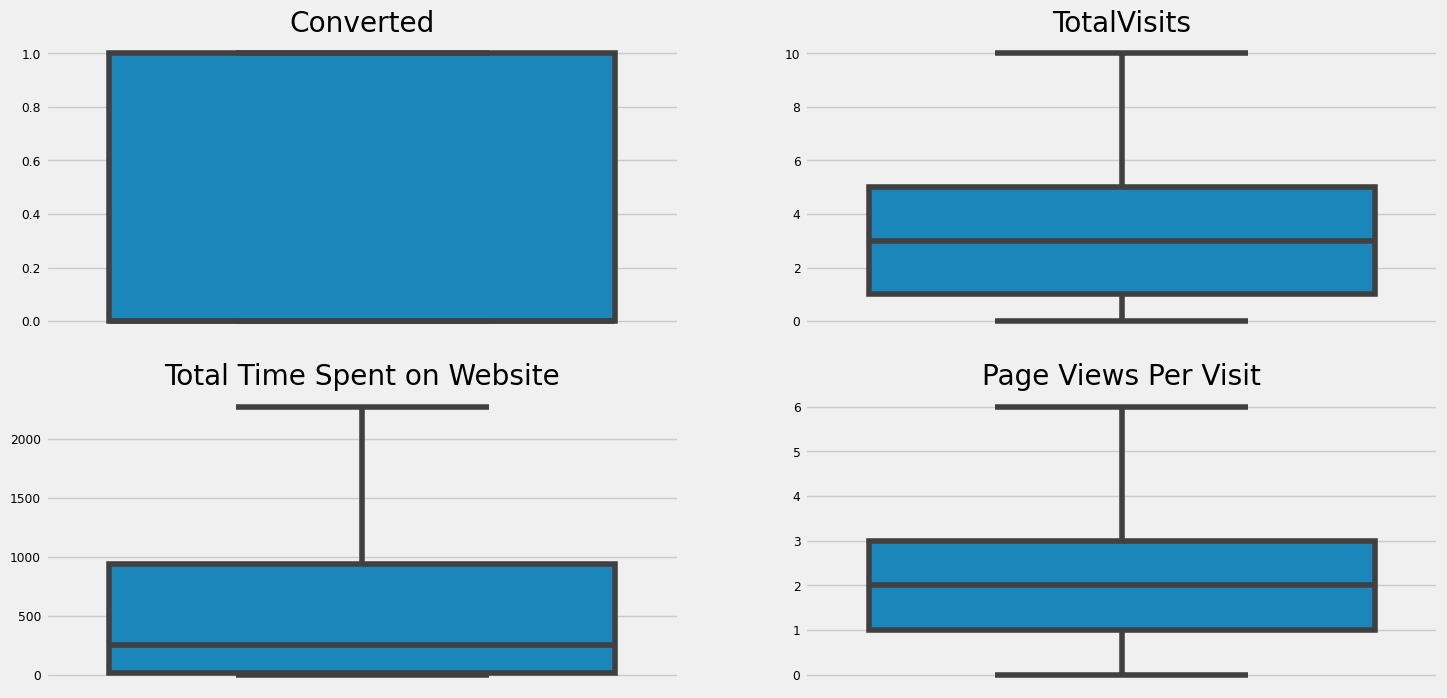

In [26]:
#replotting the graphs to check for outlier treatment
i=1
plt.figure(figsize=[16,8])
for col in numerical_col:
    plt.subplot(2,2,i)
    sns.boxplot(y=lead[col])
    plt.title(col)
    plt.ylabel('')
    i+=1

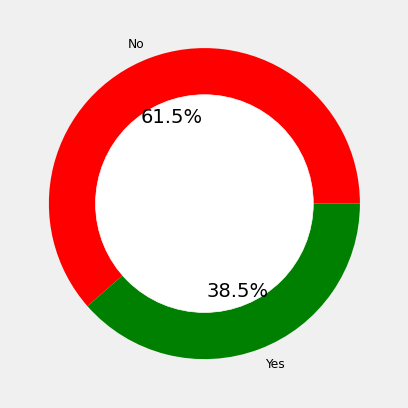

In [27]:
converted=lead['Converted'].value_counts().rename_axis('unique_values').to_frame('counts')
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(converted.counts, labels = ['No','Yes'],colors = ['red','green'],autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [28]:
# Checking the percentile values again 
lead.describe(percentiles=[.1,.5,.25,.75,.90,.95,.99])

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9103.000000,9240.000000,9103.000000
mean,0.385390,3.181918,487.698268,2.258944
std,0.486714,2.781834,548.021466,1.792536
min,0.000000,0.000000,0.000000,0.000000
10%,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,12.000000,1.000000
50%,0.000000,3.000000,248.000000,2.000000
75%,1.000000,5.000000,936.000000,3.000000
90%,1.000000,7.000000,1380.000000,5.000000
95%,1.000000,10.000000,1562.000000,6.000000


### **Converting categorical features**

In [29]:
# Checking the unique value counts for categorcial columns
lead.nunique().sort_values()


A free copy of Mastering The Interview              2
Through Recommendations                             2
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
Digital Advertisement                               2
Newspaper                                           2
X Education Forums                                  2
Newspaper Article                                   2
Search                                              2
What matters most to you in choosing a course       3
Lead Origin                                         5
City                                                6
What is your current occupation                     6
TotalVisits                                        11
Last Activity                                      17
Specialization                                     18
Lead Source                                        21
Country                     

In [30]:
# Checking the categorical values for 'Do Not Email' feature
lead['Do Not Email'].value_counts()

No     8506
Yes     734
Name: Do Not Email, dtype: int64

In [31]:
le = LabelEncoder()
lead['Do Not Email'] = le.fit_transform(lead['Do Not Email'])

In [32]:
# rechecking the categorical values for 'Do Not Email' feature
lead['Do Not Email'].value_counts()

0    8506
1     734
Name: Do Not Email, dtype: int64

In [33]:
column_labels={}
categorical_col = lead.select_dtypes(exclude =["number"]).columns.values
for category in categorical_col:
    print(category)
    print(lead[category].value_counts())
    lead[category] = le.fit_transform(lead[category])
    keys = le.inverse_transform(lead[category])
    column_labels[category]=dict(zip(le.classes_, range(len(le.classes_))))
    print(lead[category].value_counts())
    print("")
print(column_labels)

Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
1    4886
0    3580
2     718
3      55
4       1
Name: Lead Origin, dtype: int64

Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64
3     2868
1     2543
6     1755
7     1154
10     534
14     142
11     125
2       55
21      36
15       6
17       5
0 

In [34]:
lead.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,City,A free copy of Mastering The Interview
0,0,6,0,0,0,0.0,0,0.0,10,38,...,4,0,0,0,0,0,0,0,6,0
1,0,7,0,0,0,5.0,674,2.5,5,12,...,4,0,0,0,0,0,0,0,6,0
2,1,1,0,0,1,2.0,1532,2.0,5,12,...,3,0,0,0,0,0,0,0,0,1
3,1,1,0,0,0,1.0,305,1.0,13,12,...,4,0,0,0,0,0,0,0,0,0
4,1,3,0,0,1,2.0,1428,1.0,1,12,...,4,0,0,0,0,0,0,0,0,0


In [35]:
lead = lead.dropna()

Y = lead['Converted']
X = lead.drop(['Converted'], axis=1)
# X.replace(np.nan,0)
correlations = X.corrwith(Y)
# Sort the correlations in descending order
sorted_correlations = correlations.abs().sort_values(ascending=False)
# Print the sorted correlations
print(sorted_correlations)

Total Time Spent on Website                      0.354939
What matters most to you in choosing a course    0.325617
Last Activity                                    0.238595
What is your current occupation                  0.228542
Lead Origin                                      0.214488
Lead Source                                      0.163214
Specialization                                   0.137674
Do Not Email                                     0.136553
City                                             0.061307
TotalVisits                                      0.046728
Country                                          0.040353
A free copy of Mastering The Interview           0.033079
Through Recommendations                          0.019092
Do Not Call                                      0.018927
X Education Forums                               0.008209
Newspaper                                        0.008209
Digital Advertisement                            0.005624
Page Views Per

In [36]:
# Select the top N features
N = 10
top_features = sorted_correlations.index[:N]

# Print the top features
print(top_features)

Index(['Total Time Spent on Website',
       'What matters most to you in choosing a course', 'Last Activity',
       'What is your current occupation', 'Lead Origin', 'Lead Source',
       'Specialization', 'Do Not Email', 'City', 'TotalVisits'],
      dtype='object')


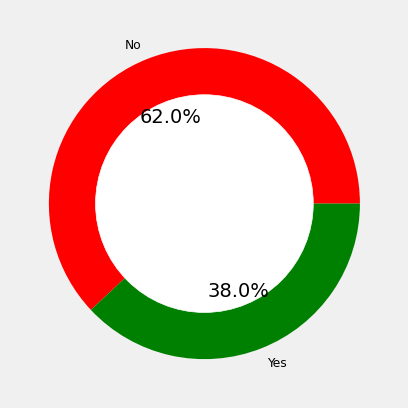

In [37]:
converted=lead['Converted'].value_counts().rename_axis('unique_values').to_frame('counts')
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(converted.counts, labels = ['No','Yes'],colors = ['red','green'],autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

### **Data Spiliting**

In [38]:

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=96)

In [39]:
#Checking the shape of the created Train & Test DFs
print(" Shape of X_train is : ",X_train.shape)
print(" Shape of y_train is : ",y_train.shape)
print(" Shape of X_test is  : ",X_test.shape)
print(" Shape of y_test is  : ",y_test.shape)

 Shape of X_train is :  (7282, 20)
 Shape of y_train is :  (7282,)
 Shape of X_test is  :  (1821, 20)
 Shape of y_test is  :  (1821,)


## **Model Selection & Training**

**Logistic regression is a statistical method for predicting the likelihood of a lead converting into a paying customer. It creates a model by identifying the relationship between the dependent variable (whether a lead converted to a customer) and one or more independent factors (such as demographic data, website activity, or email engagement). Based on the values of the independent variables, the model estimates the likelihood of a lead converting, and firms may use this to prioritise leads for sales and marketing activities. Logistic regression enables reliable forecasts, allowing businesses to focus their time and resources on leads that are most likely to result in a sale.**

In [41]:

logreg1 = LogisticRegression()


# train the log reg model using training dataset
logreg1.fit(X_train, y_train)

#predicting the target variable for test dataset
y_pred = logreg1.predict(X_test)

y_pred_train = logreg1.predict(X_train)


c:\Users\umara\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [43]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
fp, tp, th = roc_curve(y_test, y_pred)
fp1, tp1, th1 = roc_curve(y_train, y_pred_train)

print("Train Accuracy:", logreg1.score(X_train, y_train))
print("Test Accuracy:", accuracy)
print("\nTrain Precision:", precision_score(y_train, y_pred_train))
print("Test Precision:", precision)
print("\nTrain Recall:", recall_score(y_train,y_pred_train))
print("Test Recall:", recall)
print("\nTrain F1 Score:", f1_score(y_train, y_pred_train))
print("Test F1 Score:", f1)
print("\nTrain AUC:", round(auc(fp1, tp1),5))
print("Test AUC:", round(auc(fp, tp),5))

Train Accuracy: 0.7776709695138698
Test Accuracy: 0.7885777045579352

Train Precision: 0.7309062129006727
Test Precision: 0.7400662251655629

Train Recall: 0.6629576453697057
Test Recall: 0.6622222222222223

Train F1 Score: 0.6952757387539996
Test F1 Score: 0.6989835809225958

Train AUC: 0.75586
Test AUC: 0.76261


In [44]:

logreg2 = LogisticRegression(penalty='none')


# train the log reg model using training dataset
logreg2.fit(X_train, y_train)

#predicting the target variable for test dataset
y_pred = logreg2.predict(X_test)
y_pred_train = logreg2.predict(X_train)

c:\Users\umara\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [45]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
fp, tp, th = roc_curve(y_test, y_pred)
fp1, tp1, th1 = roc_curve(y_train, y_pred_train)

print("Train Accuracy:", logreg2.score(X_train, y_train))
print("Test Accuracy:", accuracy)
print("\nTrain Precision:", precision_score(y_train, y_pred_train))
print("Test Precision:", precision)
print("\nTrain Recall:", recall_score(y_train,y_pred_train))
print("Test Recall:", recall)
print("\nTrain F1 Score:", f1_score(y_train, y_pred_train))
print("Test F1 Score:", f1)
print("\nTrain AUC:", round(auc(fp1, tp1),5))
print("Test AUC:", round(auc(fp, tp),5))

Train Accuracy: 0.777533644603131
Test Accuracy: 0.7918725974739155

Train Precision: 0.7324561403508771
Test Precision: 0.7466666666666667

Train Recall: 0.6593682699210337
Test Recall: 0.6637037037037037

Train F1 Score: 0.6939931998488855
Test F1 Score: 0.7027450980392158

Train AUC: 0.75506
Test AUC: 0.76553


In [52]:
logreg3 = LogisticRegression(penalty='none')
# train the log reg model using training dataset
logreg3.fit(X_train, y_train)

c:\Users\umara\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(penalty='none')

In [54]:
#predicting the target variable for test dataset
y_pred_proba = logreg3.predict_proba(X_test)[:,1]
y_pred_train_proba = logreg3.predict_proba(X_train)[:,1]

y_pred= np.where(y_pred_proba > 0.488, 1, 0)
y_pred_train= np.where(y_pred_train_proba > 0.488, 1, 0)
print(y_pred_proba)

[0.6111689  0.2475827  0.17367961 ... 0.1151877  0.63333371 0.49544886]


In [55]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
fp, tp, th = roc_curve(y_test, y_pred)
fp1, tp1, th1 = roc_curve(y_train, y_pred_train)

print("Train Accuracy:", logreg3.score(X_train, y_train))
print("Test Accuracy:", accuracy)
print("\nTrain Precision:", precision_score(y_train, y_pred_train))
print("Test Precision:", precision)
print("\nTrain Recall:", recall_score(y_train,y_pred_train))
print("Test Recall:", recall)
print("\nTrain F1 Score:", f1_score(y_train, y_pred_train))
print("Test F1 Score:", f1)
print("\nTrain AUC:", round(auc(fp1, tp1),5))
print("Test AUC:", round(auc(fp, tp),5))

Train Accuracy: 0.777533644603131
Test Accuracy: 0.7924217462932455

Train Precision: 0.72900466562986
Test Precision: 0.7406807131280388

Train Recall: 0.673007896625987
Test Recall: 0.677037037037037

Train F1 Score: 0.6998880179171333
Test F1 Score: 0.7074303405572755

Train AUC: 0.75899
Test AUC: 0.76871


In [50]:
clf = [
    LogisticRegression(solver='newton-cg',penalty='none'),
    LogisticRegression(solver='lbfgs',penalty='none'),
    LogisticRegression(solver='sag',penalty='none'),
    LogisticRegression(solver='saga',penalty='none'),
    LogisticRegression(solver='liblinear',penalty='l1'),
    LogisticRegression(solver='liblinear',penalty='l2'),

    ]
clf_columns = []
clf_compare = pd.DataFrame(columns = clf_columns)

row_index = 0
for alg in clf:
        
    predicted = alg.fit(X_train, y_train).predict(X_test)
    y_train_pred = alg.fit(X_train, y_train).predict(X_train)
    
    fp_tr, tp_tr, th_tr = roc_curve(y_train, alg.fit(X_train, y_train).predict(X_train))
    fp, tp, th = roc_curve(y_test, predicted)
    clf_name = alg.__class__.__name__
    clf_compare.loc[row_index, 'Train Accuracy'] = round(alg.score(X_train, y_train), 5)
    clf_compare.loc[row_index, 'Train Precision'] = round(precision_score(y_train, y_train_pred),5)
    clf_compare.loc[row_index, 'Train F1'] = round(f1_score(y_train, y_train_pred),5)
    clf_compare.loc[row_index, 'Train Recall'] = round(recall_score(y_train, y_train_pred),5)
    clf_compare.loc[row_index, "Train AUC"] = round(auc(fp_tr,tp_tr),5)

    clf_compare.loc[row_index, 'Test Accuracy'] = round(alg.score(X_test, y_test), 5)
    clf_compare.loc[row_index, 'Test Precision'] = round(precision_score(y_test, predicted),5)
    clf_compare.loc[row_index, 'Test F1'] = round(f1_score(y_test, predicted),5)
    clf_compare.loc[row_index, 'Test Recall'] = round(recall_score(y_test, predicted),5)
    clf_compare.loc[row_index, 'Test AUC'] = round(auc(fp, tp),5)
    row_index+=1
    
clf_compare.sort_values(by = ['Test Accuracy'], ascending = False, inplace = True)    
clf_compare

c:\Users\umara\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\umara\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\umara\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\umara\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\umara\AppData\Local\Pro

,Train Accuracy,Train Precision,Train F1,Train Recall,Train AUC,Test Accuracy,Test Precision,Test F1,Test Recall,Test AUC
0,0.80074,0.76970,0.72420,0.68378,0.77850,0.80505,0.76846,0.72069,0.67852,0.77905
5,0.79937,0.76596,0.72314,0.68485,0.77759,0.80450,0.76807,0.71969,0.67704,0.77831
4,0.80115,0.76923,0.72500,0.68557,0.77924,0.80286,0.76599,0.71710,0.67407,0.77639
1,0.77753,0.73246,0.69399,0.65937,0.75506,0.79187,0.74667,0.70275,0.66370,0.76553
2,0.75501,0.71570,0.65114,0.59727,0.72495,0.76771,0.72909,0.65469,0.59407,0.73203
3,0.73483,0.69231,0.61449,0.55240,0.70013,0.74904,0.70336,0.62263,0.55852,0.70989


### Finding the best hyperparameters for the model with different algorithms

In [51]:
model = LogisticRegression()
solvers = ["lbfgs", "liblinear", 'newton-cg', 'newton-cholesky', 'sag', 'saga']
penalty = ["l1",'l2',"none","elasticnet"]
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


c:\Users\umara\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
1950 fits failed out of a total of 3600.
The score on these train-test partitions for these parameters will be set to 0.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\umara\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\umara\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Users\umara\AppData\Local\Programs\P

Best: 0.799551 using {'C': 1.0, 'penalty': 'l1', 'solver': 'liblinear'}
0.000000 (0.000000) with: {'C': 100, 'penalty': 'l1', 'solver': 'lbfgs'}
0.798544 (0.014205) with: {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}
0.000000 (0.000000) with: {'C': 100, 'penalty': 'l1', 'solver': 'newton-cg'}
0.000000 (0.000000) with: {'C': 100, 'penalty': 'l1', 'solver': 'newton-cholesky'}
0.000000 (0.000000) with: {'C': 100, 'penalty': 'l1', 'solver': 'sag'}
0.730112 (0.014275) with: {'C': 100, 'penalty': 'l1', 'solver': 'saga'}
0.777488 (0.013719) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.799185 (0.014691) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.798544 (0.014329) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.000000 (0.000000) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cholesky'}
0.750207 (0.015301) with: {'C': 100, 'penalty': 'l2', 'solver': 'sag'}
0.730157 (0.014301) with: {'C': 100, 'penalty': 'l2', 'solver': 'saga'}
0.778129 (0.013544) wi

### Finding accuracies with precision, F1 and recall scores with parameters performing the best

using the parameters from above combinations which gave the highest values of accuracies

In [65]:
clf = [
    LogisticRegression(solver='liblinear',penalty='l1',C=100),
    LogisticRegression(solver='liblinear',penalty='l2',C=100),
    LogisticRegression(solver='newton-cg',penalty='l2',C=100),
    LogisticRegression(solver='newton-cg',penalty='none',C=100),

    LogisticRegression(solver='liblinear',penalty='l1',C=10),
    LogisticRegression(solver='liblinear',penalty='l2',C=10),
    LogisticRegression(solver='newton-cg',penalty='l2',C=10),
    LogisticRegression(solver='newton-cg',penalty='none',C=10),

    LogisticRegression(solver='liblinear',penalty='l1',C=1.0),
    LogisticRegression(solver='liblinear',penalty='l2',C=1.0),
    LogisticRegression(solver='newton-cg',penalty='l2',C=1.0),
    LogisticRegression(solver='newton-cg',penalty='none',C=1.0),

    LogisticRegression(solver='liblinear',penalty='l1',C=0.1),
    LogisticRegression(solver='newton-cg',penalty='l2',C=0.1),
    LogisticRegression(solver='newton-cg',penalty='none',C=0.1),
    LogisticRegression(solver='newton-cg',penalty='none',C=00.1),

    LogisticRegression(solver='liblinear',penalty='l1'),
    LogisticRegression(solver='lbfgs',penalty='none'),
    LogisticRegression(solver='sag',penalty='none'),
    LogisticRegression(solver='saga',penalty='none'),

    ]
clf_columns = []
clf_compare = pd.DataFrame(columns = clf_columns)

row_index = 0
for alg in clf:
        
    predicted = alg.fit(X_train, y_train).predict(X_test)
    y_train_pred = alg.fit(X_train, y_train).predict(X_train)
    
    fp_tr, tp_tr, th_tr = roc_curve(y_train, alg.fit(X_train, y_train).predict(X_train))
    fp, tp, th = roc_curve(y_test, predicted)
    clf_name = alg.__class__.__name__
    clf_compare.loc[row_index, 'Train Accuracy'] = round(alg.score(X_train, y_train), 5)
    clf_compare.loc[row_index, 'Train Precision'] = round(precision_score(y_train, y_train_pred),5)
    clf_compare.loc[row_index, 'Train F1'] = round(f1_score(y_train, y_train_pred),5)
    clf_compare.loc[row_index, 'Train Recall'] = round(recall_score(y_train, y_train_pred),5)
    clf_compare.loc[row_index, "Train AUC"] = round(auc(fp_tr,tp_tr),5)

    clf_compare.loc[row_index, 'Test Accuracy'] = round(alg.score(X_test, y_test), 5)
    clf_compare.loc[row_index, 'Test Precision'] = round(precision_score(y_test, predicted),5)
    clf_compare.loc[row_index, 'Test F1'] = round(f1_score(y_test, predicted),5)
    clf_compare.loc[row_index, 'Test Recall'] = round(recall_score(y_test, predicted),5)
    clf_compare.loc[row_index, 'Test AUC'] = round(auc(fp, tp),5)

    row_index+=1
    
clf_compare.sort_values(by = ['Test Accuracy'], ascending = False, inplace = True)    
clf_compare

c:\Users\umara\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\umara\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\umara\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\umara\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\umara\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\optimize\_linesearch.

,Train Accuracy,Train Precision,Train F1,Train Recall,Train AUC,Test Accuracy,Test Precision,Test F1,Test Recall,Test AUC
6,0.80088,0.76979,0.72444,0.68413,0.77868,0.80560,0.76884,0.72170,0.68000,0.77979
11,0.80074,0.76970,0.72420,0.68378,0.77850,0.80505,0.76846,0.72069,0.67852,0.77905
2,0.80074,0.76970,0.72420,0.68378,0.77850,0.80505,0.76846,0.72069,0.67852,0.77905
3,0.80074,0.76970,0.72420,0.68378,0.77850,0.80505,0.76846,0.72069,0.67852,0.77905
4,0.80129,0.76963,0.72537,0.68593,0.77922,0.80505,0.76846,0.72069,0.67852,0.77905
15,0.80074,0.76970,0.72420,0.68378,0.77850,0.80505,0.76846,0.72069,0.67852,0.77905
7,0.80074,0.76970,0.72420,0.68378,0.77850,0.80505,0.76846,0.72069,0.67852,0.77905
14,0.80074,0.76970,0.72420,0.68378,0.77850,0.80505,0.76846,0.72069,0.67852,0.77905
0,0.80143,0.77007,0.72517,0.68521,0.77940,0.80450,0.76807,0.71969,0.67704,0.77831
10,0.80074,0.76904,0.72451,0.68485,0.77870,0.80450,0.76807,0.71969,0.67704,0.77831


**After tuning and testing the model with different hyperparameters and algorithms the following were the best parms**

solver='newton-cg',penalty='l2',C=10


### Best Params for log reg


In [56]:
bestlogreg = LogisticRegression(solver='newton-cg',penalty='l2',C=10)
# train the log reg model using training dataset
bestlogreg.fit(X_train, y_train)

LogisticRegression(C=10, solver='newton-cg')

In [57]:
y_pred = bestlogreg.predict(X_test)
y_pred_train = bestlogreg.predict(X_train)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
fp, tp, th = roc_curve(y_test, y_pred)
fp1, tp1, th1 = roc_curve(y_train, y_pred_train)

print("Train Accuracy:", bestlogreg.score(X_train, y_train))
print("Test Accuracy:", accuracy)
print("\nTrain Precision:", precision_score(y_train, y_pred_train))
print("Test Precision:", precision)
print("\nTrain Recall:", recall_score(y_train,y_pred_train))
print("Test Recall:", recall)
print("\nTrain F1 Score:", f1_score(y_train, y_pred_train))
print("Test F1 Score:", f1)
print("\nTrain AUC:", round(auc(fp1, tp1),5))
print("Test AUC:", round(auc(fp, tp),5))

Train Accuracy: 0.8008788794287284
Test Accuracy: 0.8056013179571664

Train Precision: 0.7697899838449112
Test Precision: 0.7688442211055276

Train Recall: 0.6841349605168701
Test Recall: 0.68

Train F1 Score: 0.7244393766628658
Test F1 Score: 0.7216981132075473

Train AUC: 0.77868
Test AUC: 0.77979


In [58]:
logreg_cm_ori_train = confusion_matrix(y_train,y_pred_train)

print(logreg_cm_ori_train)

[[3926  570]
 [ 880 1906]]


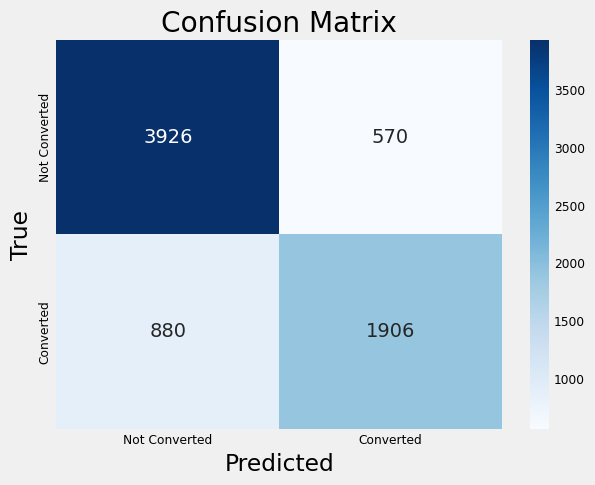

In [59]:
# Define class labels (optional)
class_labels = ['Not Converted', 'Converted']

# Create a figure and axis
fig, ax = plt.subplots()

# Create a heatmap using seaborn
sns.heatmap(logreg_cm_ori_train, annot=True, cmap='Blues', fmt='d', xticklabels=class_labels, yticklabels=class_labels, ax=ax)

# Set axis labels and title
ax.set_xlabel('Predicted')
ax.set_ylabel('True')
ax.set_title('Confusion Matrix')

# Show the plot
plt.show()


In [60]:
calculate_percentages_confusion_matrix(logreg_cm_ori_train)

True Positive Percentage: 26.17412798681681%
True Negative Percentage: 53.913759956056026%
False Positive Percentage: 7.8275199121120576%
False Negative Percentage: 12.084592145015106%
Sensitivity (True Positive Rate): 68.413496051687%
Specificity (True Negative Rate): 87.3220640569395%


In [61]:
logreg_cm_ori_test = confusion_matrix(y_test,y_pred)

print(logreg_cm_ori_test)

[[1008  138]
 [ 216  459]]


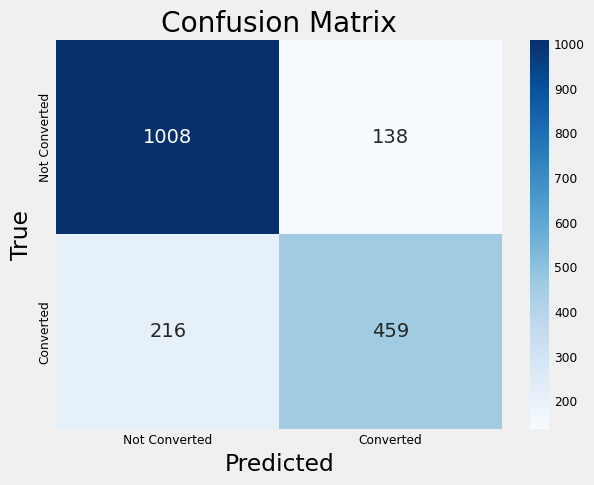

In [62]:
# Define class labels (optional)
class_labels = ['Not Converted', 'Converted']

# Create a figure and axis
fig, ax = plt.subplots()

# Create a heatmap using seaborn
sns.heatmap(logreg_cm_ori_test, annot=True, cmap='Blues', fmt='d', xticklabels=class_labels, yticklabels=class_labels, ax=ax)

# Set axis labels and title
ax.set_xlabel('Predicted')
ax.set_ylabel('True')
ax.set_title('Confusion Matrix')

# Show the plot
plt.show()


In [63]:
calculate_percentages_confusion_matrix(logreg_cm_ori_test)

True Positive Percentage: 25.205930807248766%
True Negative Percentage: 55.35420098846787%
False Positive Percentage: 7.57825370675453%
False Negative Percentage: 11.86161449752883%
Sensitivity (True Positive Rate): 68.0%
Specificity (True Negative Rate): 87.95811518324608%


Here these parameters give the highest testing accuracy with the value being 80.56% and training accuracy being 80.0878%

Both of these accuracies are almost similar hence we can be sure that model is not overfitting the dataset and is performing good 

In [64]:

# Instantiate a logistic regression model
logreg = LogisticRegression(solver='newton-cg',penalty='l2',C=10)

# Set the number of folds
k = 5

# Instantiate a KFold object
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Initialize an empty list to store validation accuracy scores
accuracy_scores = []

# Loop over the folds
for train_idx, val_idx in kf.split(X_train,y_train):
    # Split the data into training and validation sets
    X_train_k, y_train_k = X_train.iloc[train_idx], y_train.iloc[train_idx]
    X_val_k, y_val_k = X_train.iloc[val_idx], y_train.iloc[val_idx]
    
    # Fit the model to the training data
    logreg.fit(X_train_k, y_train_k)
    
    # Make predictions on the validation set
    y_pred = logreg.predict(X_val_k)
    
    # Calculate the accuracy of the model on the validation set
    accuracy = accuracy_score(y_val_k, y_pred)
    
    # Append the accuracy score to the list
    accuracy_scores.append(accuracy)

# Calculate the mean and standard deviation of the validation accuracy scores
mean_accuracy = sum(accuracy_scores) / k
std_accuracy = np.std(accuracy_scores)

# Print the mean and standard deviation of the validation accuracy scores
print(f"Mean accuracy = {mean_accuracy:.2f} +/- {std_accuracy:.2f}")


c:\Users\umara\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\optimize\_linesearch.py:415: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
c:\Users\umara\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\umara\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


Mean accuracy = 0.80 +/- 0.01


In [193]:
lead.value_counts('Converted')

# from here we can see NO was in majority where was YES was in minority

Converted
0    5642
1    3461
dtype: int64

## Data Imbanalcement

### Seperating majority and minority class

In [67]:
minority_class_len = len(lead[lead['Converted'] == 1])
majority_class_len = len(lead[lead['Converted'] == 0])
print(minority_class_len)
print(majority_class_len)

3461
5642


**Minority class here is 1**

In [68]:
minority_class = lead[lead['Converted'] == 1]
majority_class = lead[lead['Converted'] == 0]


In [69]:
X = lead.drop('Converted', axis=1)
Y = lead['Converted']


In [70]:
# Identify the minority class
minority_class = 1

# Get the indices of instances belonging to the minority class
minority_indices = np.where(Y == minority_class)[0]
majority_indices = np.where(Y != minority_class)[0]


print(len(minority_indices))
print(len(majority_indices))
# Extract the instances from the feature array
X_minority = X.iloc[minority_indices]
Y_minority = Y.iloc[minority_indices]
X_majority = X.iloc[majority_indices]
Y_majority = Y.iloc[majority_indices]

print(X_minority.shape)
print(Y_minority.shape)
print(X_majority.shape)
print(Y_majority.shape)


3461
5642
(3461, 20)
(3461,)
(5642, 20)
(5642,)


### Down sampled dataset

**The minority class i.e. '1' is 3461 and majority class i.e. '0' is 5642**  
**For down sampling we will downsample the majority class by 1400**  
**This will set majority class to 4242.**  
**Minority class will be 44.9305% and majority class to 55.0694% of training dataset**

In [71]:
downsample_length = len(X_majority) - 1400

print("majority class new len = ",downsample_length)
print("minority class len = ",len(X_minority))

# print percentages of each class
total = downsample_length + len(X_minority)
print("Percentage of majority class = ",(downsample_length/total)*100)
print("Percentage of minority class = ",(len(X_minority)/total)*100)


majority class new len =  4242
minority class len =  3461
Percentage of majority class =  55.06945345969103
Percentage of minority class =  44.93054654030897


In [72]:

X_downsampled, Y_downsampled = resample(X_majority, Y_majority, n_samples=downsample_length, random_state=48)

print(len(X_downsampled))
print(len(Y_downsampled))


X_downsampled = np.concatenate((X_downsampled, X_minority), axis=0)
Y_downsampled = np.concatenate((Y_downsampled, Y_minority), axis=0)

print(len(X_downsampled))
print(len(Y_downsampled))

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X_downsampled, Y_downsampled, train_size=0.8, test_size=0.2, random_state=48)




4242
4242
7703
7703


#### Hyperparameter tuning

In [404]:
clf = [
    LogisticRegression(solver='liblinear',penalty='l1',C=100),
    LogisticRegression(solver='liblinear',penalty='l2',C=100),
    LogisticRegression(solver='newton-cg',penalty='l2',C=100),
    LogisticRegression(solver='newton-cg',penalty='none',C=100),

    LogisticRegression(solver='liblinear',penalty='l1',C=10),
    LogisticRegression(solver='liblinear',penalty='l2',C=10),
    LogisticRegression(solver='newton-cg',penalty='l2',C=10),
    LogisticRegression(solver='newton-cg',penalty='none',C=10),

    LogisticRegression(solver='liblinear',penalty='l1',C=1.0),
    LogisticRegression(solver='liblinear',penalty='l2',C=1.0),
    LogisticRegression(solver='newton-cg',penalty='l2',C=1.0),
    LogisticRegression(solver='newton-cg',penalty='none',C=1.0),

    LogisticRegression(solver='liblinear',penalty='l1',C=0.1),
    LogisticRegression(solver='newton-cg',penalty='l2',C=0.1),
    LogisticRegression(solver='newton-cg',penalty='none',C=0.1),
    LogisticRegression(solver='newton-cg',penalty='none',C=00.1),

    LogisticRegression(solver='liblinear',penalty='l1'),
    LogisticRegression(solver='lbfgs',penalty='none'),
    LogisticRegression(solver='sag',penalty='none'),
    LogisticRegression(solver='saga',penalty='none'),

    ]
clf_columns = []
clf_compare = pd.DataFrame(columns = clf_columns)

row_index = 0
for alg in clf:
        
    predicted = alg.fit(X_train, y_train).predict(X_test)
    y_train_pred = alg.fit(X_train, y_train).predict(X_train)
    
    fp_tr, tp_tr, th_tr = roc_curve(y_train, alg.fit(X_train, y_train).predict(X_train))
    fp, tp, th = roc_curve(y_test, predicted)
    clf_name = alg.__class__.__name__
    clf_compare.loc[row_index, 'Train Accuracy'] = round(alg.score(X_train, y_train), 5)
    clf_compare.loc[row_index, 'Train Precision'] = round(precision_score(y_train, y_train_pred),5)
    clf_compare.loc[row_index, 'Train F1'] = round(f1_score(y_train, y_train_pred),5)
    clf_compare.loc[row_index, 'Train Recall'] = round(recall_score(y_train, y_train_pred),5)
    clf_compare.loc[row_index, "Train AUC"] = round(auc(fp_tr,tp_tr),5)

    clf_compare.loc[row_index, 'Test Accuracy'] = round(alg.score(X_test, y_test), 5)
    clf_compare.loc[row_index, 'Test Precision'] = round(precision_score(y_test, predicted),5)
    clf_compare.loc[row_index, 'Test F1'] = round(f1_score(y_test, predicted),5)
    clf_compare.loc[row_index, 'Test Recall'] = round(recall_score(y_test, predicted),5)
    clf_compare.loc[row_index, 'Test AUC'] = round(auc(fp, tp),5)

    row_index+=1
    
clf_compare.sort_values(by = ['Test Accuracy'], ascending = False, inplace = True)    
clf_compare

c:\Users\umara\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\umara\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\umara\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\umara\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\umara\AppData\Local\Pro

,Train Accuracy,Train Precision,Train F1,Train Recall,Train AUC,Test Accuracy,Test Precision,Test F1,Test Recall,Test AUC
10,0.79049,0.78373,0.75637,0.73085,0.78458,0.80337,0.80952,0.78217,0.75661,0.80044
1,0.79033,0.78387,0.75604,0.73012,0.78436,0.80337,0.80952,0.78217,0.75661,0.80044
5,0.78984,0.78295,0.75561,0.73012,0.78392,0.80337,0.80952,0.78217,0.75661,0.80044
15,0.79033,0.78409,0.75595,0.72976,0.78432,0.80273,0.80924,0.78129,0.75522,0.79975
14,0.79033,0.78409,0.75595,0.72976,0.78432,0.80273,0.80924,0.78129,0.75522,0.79975
13,0.78887,0.78266,0.75411,0.72757,0.78279,0.80273,0.81109,0.78066,0.75243,0.79957
11,0.79033,0.78409,0.75595,0.72976,0.78432,0.80273,0.80924,0.78129,0.75522,0.79975
0,0.79049,0.78278,0.75514,0.72939,0.78451,0.80273,0.80896,0.78042,0.75382,0.79905
7,0.79033,0.78409,0.75595,0.72976,0.78432,0.80273,0.80924,0.78129,0.75522,0.79975
6,0.79017,0.78356,0.75590,0.73012,0.78421,0.80273,0.80924,0.78129,0.75522,0.79975


In [406]:
clf_compare.sort_values(by = ['Test AUC'], ascending = False, inplace = True)    
clf_compare

,Train Accuracy,Train Precision,Train F1,Train Recall,Train AUC,Test Accuracy,Test Precision,Test F1,Test Recall,Test AUC
10,0.79049,0.78373,0.75637,0.73085,0.78458,0.80337,0.80952,0.78217,0.75661,0.80044
1,0.79033,0.78387,0.75604,0.73012,0.78436,0.80337,0.80952,0.78217,0.75661,0.80044
5,0.78984,0.78295,0.75561,0.73012,0.78392,0.80337,0.80952,0.78217,0.75661,0.80044
6,0.79017,0.78356,0.75590,0.73012,0.78421,0.80273,0.80924,0.78129,0.75522,0.79975
15,0.79033,0.78409,0.75595,0.72976,0.78432,0.80273,0.80924,0.78129,0.75522,0.79975
11,0.79033,0.78409,0.75595,0.72976,0.78432,0.80273,0.80924,0.78129,0.75522,0.79975
3,0.79033,0.78409,0.75595,0.72976,0.78432,0.80273,0.80924,0.78129,0.75522,0.79975
14,0.79033,0.78409,0.75595,0.72976,0.78432,0.80273,0.80924,0.78129,0.75522,0.79975
2,0.79033,0.78409,0.75595,0.72976,0.78432,0.80273,0.80924,0.78129,0.75522,0.79975
8,0.78887,0.78138,0.75410,0.72867,0.78297,0.80078,0.80924,0.78129,0.75522,0.79975


In [252]:
clf_compare.sort_values(by = ['Test F1'], ascending = False, inplace = True)    
clf_compare

,Train Accuracy,Train Precision,Train F1,Train Recall,Train AUC,Test Accuracy,Test Precission,Test F1,Test Recall,Test AUC
9,0.77081,0.76937,0.76923,0.76909,0.77080,0.77256,0.78125,0.77739,0.77356,0.77254
13,0.77407,0.77586,0.77117,0.76655,0.77402,0.77329,0.78561,0.77667,0.76793,0.77343
17,0.75113,0.74535,0.75153,0.75782,0.75117,0.76968,0.77451,0.77614,0.77778,0.76945
5,0.77533,0.77603,0.77291,0.76982,0.77529,0.77184,0.78417,0.77525,0.76653,0.77199
12,0.77009,0.76786,0.76884,0.76982,0.77009,0.77040,0.77952,0.77511,0.77075,0.77039
16,0.77280,0.77488,0.77106,0.76727,0.77276,0.77112,0.78386,0.77438,0.76512,0.77128
8,0.77298,0.77550,0.77210,0.76873,0.77294,0.76968,0.78386,0.77438,0.76512,0.77128
1,0.77388,0.77496,0.77128,0.76764,0.77384,0.77112,0.78468,0.77406,0.76371,0.77132
10,0.77569,0.77639,0.77327,0.77018,0.77565,0.77040,0.78355,0.77350,0.76371,0.77058
4,0.77461,0.77529,0.77218,0.76909,0.77457,0.76968,0.78242,0.77295,0.76371,0.76984


### Training Best Log Reg Model with best Hyperparameters

In [407]:

bestlogreg = LogisticRegression(solver='newton-cg',penalty='l2',C=1.0)
# train the log reg model using training dataset
bestlogreg.fit(X_train, y_train)

y_pred = bestlogreg.predict(X_test)
y_pred_train = bestlogreg.predict(X_train)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
fp, tp, th = roc_curve(y_test, y_pred)
fp1, tp1, th1 = roc_curve(y_train, y_pred_train)

print("Train Accuracy:", bestlogreg.score(X_train, y_train))
print("Test Accuracy:", accuracy)
print("\nTrain Precision:", precision_score(y_train, y_pred_train))
print("Test Precision:", precision)
print("\nTrain Recall:", recall_score(y_train,y_pred_train))
print("Test Recall:", recall)
print("\nTrain F1 Score:", f1_score(y_train, y_pred_train))
print("Test F1 Score:", f1)
print("\nTrain AUC:", round(auc(fp1, tp1),5))
print("Test AUC:", round(auc(fp, tp),5))

Train Accuracy: 0.7904901006166829
Test Accuracy: 0.8033744321868916

Train Precision: 0.7837309346890887
Test Precision: 0.8095238095238095

Train Recall: 0.7308533916849015
Test Recall: 0.7566063977746871

Train F1 Score: 0.7563691262502358
Test F1 Score: 0.7821710999281093

Train AUC: 0.78458
Test AUC: 0.80044


In [408]:
cm_down_log_train = confusion_matrix(y_train, y_pred_train)

print(cm_down_log_train)

[[2867  553]
 [ 738 2004]]


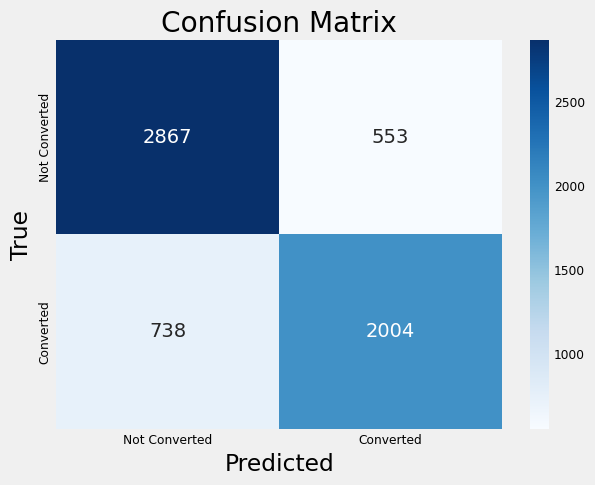

In [409]:
# Define class labels (optional)
class_labels = ['Not Converted', 'Converted']

# Create a figure and axis
fig, ax = plt.subplots()

# Create a heatmap using seaborn
sns.heatmap(cm_down_log_train, annot=True, cmap='Blues', fmt='d', xticklabels=class_labels, yticklabels=class_labels, ax=ax)

# Set axis labels and title
ax.set_xlabel('Predicted')
ax.set_ylabel('True')
ax.set_title('Confusion Matrix')

# Show the plot
plt.show()


In [410]:
calculate_percentages_confusion_matrix(cm_down_log_train)

True Positive Percentage: 32.521908471275566%
True Negative Percentage: 46.527101590392725%
False Positive Percentage: 8.974358974358974%
False Negative Percentage: 11.976630963972736%
Sensitivity (True Positive Rate): 73.08533916849015%
Specificity (True Negative Rate): 83.83040935672514%


In [411]:
cm_down_log_test = confusion_matrix(y_test, y_pred)

print(cm_down_log_test)

[[694 128]
 [175 544]]


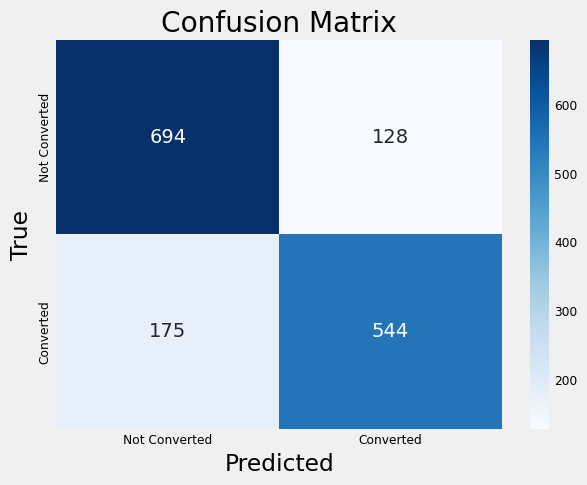

In [412]:
# Define class labels (optional)
class_labels = ['Not Converted', 'Converted']

# Create a figure and axis
fig, ax = plt.subplots()

# Create a heatmap using seaborn
sns.heatmap(cm_down_log_test, annot=True, cmap='Blues', fmt='d', xticklabels=class_labels, yticklabels=class_labels, ax=ax)

# Set axis labels and title
ax.set_xlabel('Predicted')
ax.set_ylabel('True')
ax.set_title('Confusion Matrix')

# Show the plot
plt.show()


In [413]:
calculate_percentages_confusion_matrix(cm_down_log_test)

True Positive Percentage: 35.30175210902012%
True Negative Percentage: 45.035691109669045%
False Positive Percentage: 8.306294613887086%
False Negative Percentage: 11.35626216742375%
Sensitivity (True Positive Rate): 75.6606397774687%
Specificity (True Negative Rate): 84.42822384428223%


### K-fold Testing for downsample

In [414]:

# Instantiate a logistic regression model
logreg = LogisticRegression(solver='newton-cg',penalty='l2',C=1.0)

# Set the number of folds
k = 5

# Instantiate a KFold object
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Initialize an empty list to store validation accuracy scores
accuracy_scores = []
precision_scores = []
f1_scores = []
recall_scores = []
auc_scores = []

# Loop over the folds
for train_idx, val_idx in kf.split(X_train,y_train):
    # Split the data into training and validation sets
    X_train_k, y_train_k = X_train[train_idx], y_train[train_idx]
    X_val_k, y_val_k = X_train[val_idx], y_train[val_idx]
    
    # Fit the model to the training data
    logreg.fit(X_train_k, y_train_k)
    
    # Make predictions on the validation set
    y_pred = logreg.predict(X_val_k)
    
    # Calculate the accuracy, precision, recall, f1, auc of the model on the validation set
    accuracy = accuracy_score(y_val_k, y_pred)
    precision = precision_score(y_val_k, y_pred)
    recall = recall_score(y_val_k, y_pred)
    f1 = f1_score(y_val_k, y_pred)
    fp, tp, th = roc_curve(y_val_k, y_pred)
    
    # Append the accuracy score to the list
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    auc_scores.append(round(auc(fp, tp),5))



# Calculate the mean and standard deviation of the validation accuracy scores, precision, recall, f1, auc
mean_accuracy = sum(accuracy_scores) / k
std_accuracy = np.std(accuracy_scores)

mean_precision = sum(precision_scores) / k
std_precision = np.std(precision_scores)

mean_recall = sum(recall_scores) / k
std_recall = np.std(recall_scores)

mean_f1 = sum(f1_scores) / k
std_f1 = np.std(f1_scores)  

mean_auc = sum(auc_scores) / k
std_auc = np.std(auc_scores)


# Print the mean and standard deviation of the validation accuracy scores, precision, recall, f1, auc
print(f"Mean accuracy = {mean_accuracy:.4f} +/- {std_accuracy:.4f}")
print(f"Mean precision = {mean_precision:.4f} +/- {std_precision:.4f}")
print(f"Mean recall = {mean_recall:.4f} +/- {std_recall:.4f}")
print(f"Mean f1 = {mean_f1:.4f} +/- {std_f1:.4f}")
print(f"Mean auc = {mean_auc:.4f} +/- {std_auc:.4f}")




c:\Users\umara\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\optimize\_linesearch.py:415: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
c:\Users\umara\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\umara\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


Mean accuracy = 0.7814 +/- 0.0164
Mean precision = 0.7683 +/- 0.0209
Mean recall = 0.7282 +/- 0.0211
Mean f1 = 0.7476 +/- 0.0195
Mean auc = 0.7760 +/- 0.0163


### **Up sampled dataset**

**The minority class i.e. '1' is 3461 and majority class i.e. '0' is 5642**  
**For down sampling we will upsample the minority class by 1500**  
**This will set minority class to 4961.**  
**Minority class will be 46.7886% and majority class to 53.2113% of training dataset**  
**Total entries being: 10603**

In [234]:
upsample_length = len(X_minority) + 1500

print("majority class new len = ",len(majority_class))
print("minority class len = ",upsample_length)

# print percentages of each class
total = upsample_length + len(majority_class)
print("Percentage of majority class = ",(len(majority_class)/total)*100)
print("Percentage of minority class = ",(upsample_length/total)*100)

print("Total number of records = ",total)


majority class new len =  5642
minority class len =  4961
Percentage of majority class =  53.21135527680845
Percentage of minority class =  46.788644723191545
Total number of records =  10603


In [254]:
X_upsampled, Y_upsampled = resample(X_minority, Y_minority, n_samples=upsample_length, random_state=42)

print(len(X_upsampled))
print(len(Y_upsampled))
X_upsampled = np.concatenate((X_upsampled, X_majority), axis=0)
Y_upsampled = np.concatenate((Y_upsampled, Y_majority), axis=0)

print(len(X_upsampled))
print(len(Y_upsampled))


# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X_upsampled, Y_upsampled, train_size=0.8, test_size=0.2, random_state=96)


4961
4961
10603
10603


In [255]:
clf = [
    LogisticRegression(solver='liblinear',penalty='l1',C=100),
    LogisticRegression(solver='liblinear',penalty='l2',C=100),
    LogisticRegression(solver='newton-cg',penalty='l2',C=100),
    LogisticRegression(solver='newton-cg',penalty='none',C=100),

    LogisticRegression(solver='liblinear',penalty='l1',C=10),
    LogisticRegression(solver='liblinear',penalty='l2',C=10),
    LogisticRegression(solver='newton-cg',penalty='l2',C=10),
    LogisticRegression(solver='newton-cg',penalty='none',C=10),

    LogisticRegression(solver='liblinear',penalty='l1',C=1.0),
    LogisticRegression(solver='liblinear',penalty='l2',C=1.0),
    LogisticRegression(solver='newton-cg',penalty='l2',C=1.0),
    LogisticRegression(solver='newton-cg',penalty='none',C=1.0),

    LogisticRegression(solver='liblinear',penalty='l1',C=0.1),
    LogisticRegression(solver='newton-cg',penalty='l2',C=0.1),
    LogisticRegression(solver='newton-cg',penalty='none',C=0.1),
    LogisticRegression(solver='newton-cg',penalty='none',C=00.1),

    LogisticRegression(solver='liblinear',penalty='l1'),
    LogisticRegression(solver='lbfgs',penalty='none'),
    LogisticRegression(solver='sag',penalty='none'),
    LogisticRegression(solver='saga',penalty='none'),

    ]
clf_columns = []
clf_compare = pd.DataFrame(columns = clf_columns)

row_index = 0
for alg in clf:
        
    predicted = alg.fit(X_train, y_train).predict(X_test)
    y_train_pred = alg.fit(X_train, y_train).predict(X_train)
    
    fp_tr, tp_tr, th_tr = roc_curve(y_train, alg.fit(X_train, y_train).predict(X_train))
    fp, tp, th = roc_curve(y_test, predicted)
    clf_name = alg.__class__.__name__
    clf_compare.loc[row_index, 'Train Accuracy'] = round(alg.score(X_train, y_train), 5)
    clf_compare.loc[row_index, 'Train Precision'] = round(precision_score(y_train, y_train_pred),5)
    clf_compare.loc[row_index, 'Train F1'] = round(f1_score(y_train, y_train_pred),5)
    clf_compare.loc[row_index, 'Train Recall'] = round(recall_score(y_train, y_train_pred),5)
    clf_compare.loc[row_index, "Train AUC"] = round(auc(fp_tr,tp_tr),5)

    clf_compare.loc[row_index, 'Test Accuracy'] = round(alg.score(X_test, y_test), 5)
    clf_compare.loc[row_index, 'Test Precision'] = round(precision_score(y_test, predicted),5)
    clf_compare.loc[row_index, 'Test F1'] = round(f1_score(y_test, predicted),5)
    clf_compare.loc[row_index, 'Test Recall'] = round(recall_score(y_test, predicted),5)
    clf_compare.loc[row_index, 'Test AUC'] = round(auc(fp, tp),5)

    row_index+=1
    
clf_compare.sort_values(by = ['Test Accuracy'], ascending = False, inplace = True)    
clf_compare

c:\Users\umara\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\umara\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\umara\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\umara\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\umara\AppData\Local\Pro

,Train Accuracy,Train Precision,Train F1,Train Recall,Train AUC,Test Accuracy,Test Precission,Test F1,Test Recall,Test AUC
6,0.77376,0.76248,0.75255,0.74287,0.77163,0.79349,0.79024,0.78717,0.78412,0.79326
2,0.77387,0.76268,0.75264,0.74287,0.77174,0.79302,0.78947,0.78679,0.78412,0.79280
0,0.77376,0.76242,0.75239,0.74262,0.77163,0.79255,0.78870,0.78641,0.78412,0.79234
7,0.77364,0.76255,0.75232,0.74236,0.77149,0.79255,0.78927,0.78620,0.78316,0.79231
15,0.77364,0.76255,0.75232,0.74236,0.77149,0.79255,0.78927,0.78620,0.78316,0.79231
14,0.77364,0.76255,0.75232,0.74236,0.77149,0.79255,0.78927,0.78620,0.78316,0.79231
11,0.77364,0.76255,0.75232,0.74236,0.77149,0.79255,0.78927,0.78620,0.78316,0.79231
10,0.77376,0.76275,0.75242,0.74236,0.77160,0.79255,0.78983,0.78599,0.78219,0.79229
5,0.77387,0.76254,0.75271,0.74313,0.77176,0.79255,0.78870,0.78641,0.78412,0.79234
4,0.77376,0.76249,0.75216,0.74211,0.77163,0.79255,0.78947,0.78679,0.78412,0.79280


In [256]:
clf_compare.sort_values(by = ['Test AUC'], ascending = False, inplace = True)    
clf_compare

,Train Accuracy,Train Precision,Train F1,Train Recall,Train AUC,Test Accuracy,Test Precission,Test F1,Test Recall,Test AUC
6,0.77376,0.76248,0.75255,0.74287,0.77163,0.79349,0.79024,0.78717,0.78412,0.79326
2,0.77387,0.76268,0.75264,0.74287,0.77174,0.79302,0.78947,0.78679,0.78412,0.79280
4,0.77376,0.76249,0.75216,0.74211,0.77163,0.79255,0.78947,0.78679,0.78412,0.79280
0,0.77376,0.76242,0.75239,0.74262,0.77163,0.79255,0.78870,0.78641,0.78412,0.79234
5,0.77387,0.76254,0.75271,0.74313,0.77176,0.79255,0.78870,0.78641,0.78412,0.79234
11,0.77364,0.76255,0.75232,0.74236,0.77149,0.79255,0.78927,0.78620,0.78316,0.79231
3,0.77364,0.76255,0.75232,0.74236,0.77149,0.79255,0.78927,0.78620,0.78316,0.79231
14,0.77364,0.76255,0.75232,0.74236,0.77149,0.79255,0.78927,0.78620,0.78316,0.79231
15,0.77364,0.76255,0.75232,0.74236,0.77149,0.79255,0.78927,0.78620,0.78316,0.79231
7,0.77364,0.76255,0.75232,0.74236,0.77149,0.79255,0.78927,0.78620,0.78316,0.79231


In [257]:
clf_compare.sort_values(by = ['Test F1'], ascending = False, inplace = True)    
clf_compare

,Train Accuracy,Train Precision,Train F1,Train Recall,Train AUC,Test Accuracy,Test Precission,Test F1,Test Recall,Test AUC
6,0.77376,0.76248,0.75255,0.74287,0.77163,0.79349,0.79024,0.78717,0.78412,0.79326
2,0.77387,0.76268,0.75264,0.74287,0.77174,0.79302,0.78947,0.78679,0.78412,0.79280
4,0.77376,0.76249,0.75216,0.74211,0.77163,0.79255,0.78947,0.78679,0.78412,0.79280
0,0.77376,0.76242,0.75239,0.74262,0.77163,0.79255,0.78870,0.78641,0.78412,0.79234
5,0.77387,0.76254,0.75271,0.74313,0.77176,0.79255,0.78870,0.78641,0.78412,0.79234
11,0.77364,0.76255,0.75232,0.74236,0.77149,0.79255,0.78927,0.78620,0.78316,0.79231
3,0.77364,0.76255,0.75232,0.74236,0.77149,0.79255,0.78927,0.78620,0.78316,0.79231
14,0.77364,0.76255,0.75232,0.74236,0.77149,0.79255,0.78927,0.78620,0.78316,0.79231
15,0.77364,0.76255,0.75232,0.74236,0.77149,0.79255,0.78927,0.78620,0.78316,0.79231
7,0.77364,0.76255,0.75232,0.74236,0.77149,0.79255,0.78927,0.78620,0.78316,0.79231


In [263]:

bestlogreg = LogisticRegression(solver='newton-cg',penalty='l2',C=10)
# train the log reg model using training dataset
bestlogreg.fit(X_train, y_train)

y_pred = bestlogreg.predict(X_test)
y_pred_train = bestlogreg.predict(X_train)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
fp, tp, th = roc_curve(y_test, y_pred)
fp1, tp1, th1 = roc_curve(y_train, y_pred_train)

print("Train Accuracy:", bestlogreg.score(X_train, y_train))
print("Test Accuracy:", accuracy)
print("\nTrain Precision:", precision_score(y_train, y_pred_train))
print("Test Precision:", precision)
print("\nTrain Recall:", recall_score(y_train,y_pred_train))
print("Test Recall:", recall)
print("\nTrain F1 Score:", f1_score(y_train, y_pred_train))
print("Test F1 Score:", f1)
print("\nTrain AUC:", round(auc(fp1, tp1),5))
print("Test AUC:", round(auc(fp, tp),5))

Train Accuracy: 0.7737561895779297
Test Accuracy: 0.7934936350777935

Train Precision: 0.7624771361379671
Test Precision: 0.7902439024390244

Train Recall: 0.7428716904276986
Test Recall: 0.7841239109390126

Train F1 Score: 0.7525467440361057
Test F1 Score: 0.7871720116618076

Train AUC: 0.77163
Test AUC: 0.79326


In [266]:
cm_up_log_train = confusion_matrix(y_train, y_pred_train)

print(cm_up_log_train)

[[3645  909]
 [1010 2918]]


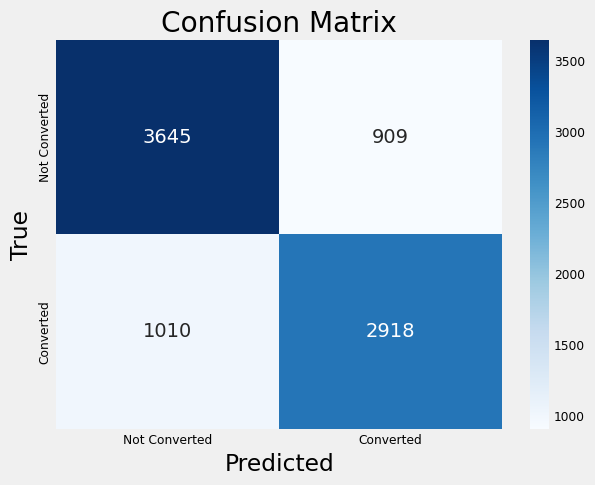

In [267]:
# Define class labels (optional)
class_labels = ['Not Converted', 'Converted']

# Create a figure and axis
fig, ax = plt.subplots()

# Create a heatmap using seaborn
sns.heatmap(cm_up_log_train, annot=True, cmap='Blues', fmt='d', xticklabels=class_labels, yticklabels=class_labels, ax=ax)

# Set axis labels and title
ax.set_xlabel('Predicted')
ax.set_ylabel('True')
ax.set_title('Confusion Matrix')

# Show the plot
plt.show()


In [283]:
calculate_percentages_confusion_matrix(cm_up_log_train)

True Positive Percentage: 34.40226361707144%
True Negative Percentage: 42.973355340721525%
False Positive Percentage: 10.71681207262438%
False Negative Percentage: 11.907568969582645%
Sensitivity (True Positive Rate): 74.28716904276986%
Specificity (True Negative Rate): 80.03952569169961%


In [268]:
cm_up_log_test = confusion_matrix(y_test, y_pred)

print(cm_up_log_test)

[[873 215]
 [223 810]]


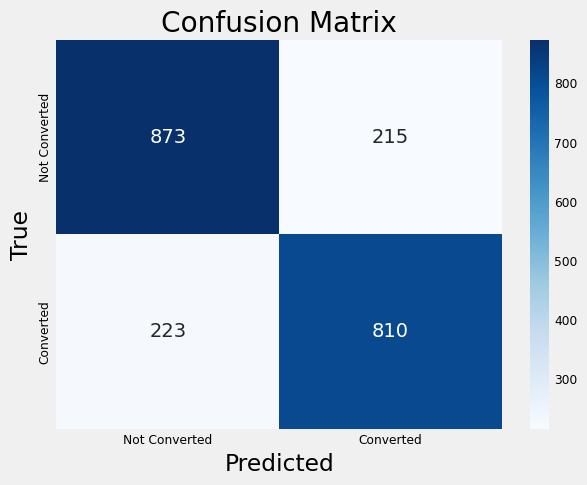

In [284]:
# Define class labels (optional)
class_labels = ['Not Converted', 'Converted']

# Create a figure and axis
fig, ax = plt.subplots()

# Create a heatmap using seaborn
sns.heatmap(cm_up_log_test, annot=True, cmap='Blues', fmt='d', xticklabels=class_labels, yticklabels=class_labels, ax=ax)

# Set axis labels and title
ax.set_xlabel('Predicted')
ax.set_ylabel('True')
ax.set_title('Confusion Matrix')

# Show the plot
plt.show()


In [285]:
calculate_percentages_confusion_matrix(cm_up_log_test)

True Positive Percentage: 38.189533239038184%
True Negative Percentage: 41.15983026874116%
False Positive Percentage: 10.136727958510136%
False Negative Percentage: 10.513908533710515%
Sensitivity (True Positive Rate): 78.41239109390126%
Specificity (True Negative Rate): 80.23897058823529%


##### Kfold for upsampled 

In [ ]:

# Instantiate a logistic regression model
logreg = LogisticRegression(solver='newton-cg',penalty='l2',C=10)

# Set the number of folds
k = 5

# Instantiate a KFold object
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Initialize an empty list to store validation accuracy scores
accuracy_scores = []
precision_scores = []
f1_scores = []
recall_scores = []
auc_scores = []

# Loop over the folds
for train_idx, val_idx in kf.split(X_train,y_train):
    # Split the data into training and validation sets
    X_train_k, y_train_k = X_train[train_idx], y_train[train_idx]
    X_val_k, y_val_k = X_train[val_idx], y_train[val_idx]
    
    # Fit the model to the training data
    logreg.fit(X_train_k, y_train_k)
    
    # Make predictions on the validation set
    y_pred = logreg.predict(X_val_k)
    
    # Calculate the accuracy, precision, recall, f1, auc of the model on the validation set
    accuracy = accuracy_score(y_val_k, y_pred)
    precision = precision_score(y_val_k, y_pred)
    recall = recall_score(y_val_k, y_pred)
    f1 = f1_score(y_val_k, y_pred)
    fp, tp, th = roc_curve(y_val_k, y_pred)
    
    # Append the accuracy score to the list
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    auc_scores.append(round(auc(fp, tp),5))



# Calculate the mean and standard deviation of the validation accuracy scores, precision, recall, f1, auc
mean_accuracy = sum(accuracy_scores) / k
std_accuracy = np.std(accuracy_scores)

mean_precision = sum(precision_scores) / k
std_precision = np.std(precision_scores)

mean_recall = sum(recall_scores) / k
std_recall = np.std(recall_scores)

mean_f1 = sum(f1_scores) / k
std_f1 = np.std(f1_scores)  

mean_auc = sum(auc_scores) / k
std_auc = np.std(auc_scores)


# Print the mean and standard deviation of the validation accuracy scores, precision, recall, f1, auc
print(f"Mean accuracy = {mean_accuracy:.4f} +/- {std_accuracy:.4f}")
print(f"Mean precision = {mean_precision:.4f} +/- {std_precision:.4f}")
print(f"Mean recall = {mean_recall:.4f} +/- {std_recall:.4f}")
print(f"Mean f1 = {mean_f1:.4f} +/- {std_f1:.4f}")
print(f"Mean auc = {mean_auc:.4f} +/- {std_auc:.4f}")




## Random Forest

#### Without hyperparameter training

In [336]:
# original data

X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=96)

In [337]:
randomForestModel = RandomForestClassifier(n_estimators=100, random_state=None)


randomForestModel.fit(X_train, y_train)

y_pred = randomForestModel.predict(X_test)
y_pred_train = randomForestModel.predict(X_train)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
fp, tp, th = roc_curve(y_test, y_pred)
fp1, tp1, th1 = roc_curve(y_train, y_pred_train)

print("Train Accuracy:", randomForestModel.score(X_train, y_train))
print("Test Accuracy:", accuracy)
print("\nTrain Precision:", precision_score(y_train, y_pred_train))
print("Test Precision:", precision)
print("\nTrain Recall:", recall_score(y_train,y_pred_train))
print("Test Recall:", recall)
print("\nTrain F1 Score:", f1_score(y_train, y_pred_train))
print("Test F1 Score:", f1)
print("\nTrain AUC:", round(auc(fp1, tp1),5))
print("Test AUC:", round(auc(fp, tp),5))


Train Accuracy: 0.9740455918703653
Test Accuracy: 0.8248215266337178

Train Precision: 0.9692808095410191
Test Precision: 0.770516717325228

Train Recall: 0.9626704953338119
Test Recall: 0.7511111111111111

Train F1 Score: 0.9659643435980552
Test F1 Score: 0.7606901725431358

Train AUC: 0.97188
Test AUC: 0.80967


In [ ]:
# Create a random forest classifier
model = RandomForestClassifier()

# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300],              # Number of trees
    'max_depth': [None, 5, 10],                    # Maximum depth of trees
    'min_samples_split': [2, 5, 10],               # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4],                 # Minimum samples required at a leaf node
    'max_features': ['auto', 'sqrt', 'log2']       # Number of features to consider at each split
}

# Perform grid search using cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)  # X_train and y_train are your training data

# Print the best hyperparameters found
print("Best Hyperparameters:", grid_search.best_params_)

In [246]:
# Print the best hyperparameters found
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}


In [338]:
randomForestModel = RandomForestClassifier(n_estimators=200,max_features="auto",
                                max_depth=None, random_state=96,
                                min_samples_leaf=4, min_samples_split=2)

randomForestModel.fit(X_train, y_train)

y_pred = randomForestModel.predict(X_test)
y_pred_train = randomForestModel.predict(X_train)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
fp, tp, th = roc_curve(y_test, y_pred)
fp1, tp1, th1 = roc_curve(y_train, y_pred_train)

print("Train Accuracy:", randomForestModel.score(X_train, y_train))
print("Test Accuracy:", accuracy)
print("\nTrain Precision:", precision_score(y_train, y_pred_train))
print("Test Precision:", precision)
print("\nTrain Recall:", recall_score(y_train,y_pred_train))
print("Test Recall:", recall)
print("\nTrain F1 Score:", f1_score(y_train, y_pred_train))
print("Test F1 Score:", f1)
print("\nTrain AUC:", round(auc(fp1, tp1),5))
print("Test AUC:", round(auc(fp, tp),5))

c:\Users\umara\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Train Accuracy: 0.862675089261192
Test Accuracy: 0.8407468423942889

Train Precision: 0.8398021308980214
Test Precision: 0.7938931297709924

Train Recall: 0.7921751615218952
Test Recall: 0.7703703703703704

Train F1 Score: 0.81529368304396
Test F1 Score: 0.7819548872180452

Train AUC: 0.84927
Test AUC: 0.82628


#### Hyperparameter training

In [272]:
model = RandomForestClassifier()

param_grid = {
    'n_estimators': [100, 200, 300],              # Number of trees
    'max_depth': [None, 5, 10],                    # Maximum depth of trees
    'min_samples_split': [2, 5, 10],               # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4],                 # Minimum samples required at a leaf node
    'max_features': ['auto', 'sqrt', 'log2']       # Number of features to consider at each split
}

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=96)
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv, scoring='f1',refit=False, error_score=0)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.771550 using {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
0.752061 (0.018208) with: {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
0.755223 (0.019443) with: {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
0.756768 (0.019749) with: {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
0.761468 (0.019495) with: {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
0.762362 (0.020007) with: {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
0.762175 (0.021081) with: {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
0.764547 (0.019595) with: {'max_depth': N

In [273]:
for mean, stdev, param in zip(means, stds, params):
    if mean >= 0.77:
        print("%f (%f) with: %r" % (mean, stdev, param))

0.770254 (0.017989) with: {'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
0.771125 (0.018720) with: {'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
0.770134 (0.018156) with: {'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
0.770790 (0.017769) with: {'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
0.770092 (0.018614) with: {'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
0.770335 (0.017088) with: {'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
0.771126 (0.017923) with: {'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
0.770126 (0.017564) with: {'max_depth': 10, 'ma

#### Best Hyperparameters

In [315]:
clf = [
        RandomForestClassifier(n_estimators=100,max_features="auto",
                            max_depth=None, random_state=72,
                            min_samples_leaf=4, min_samples_split=2),
        RandomForestClassifier(n_estimators=200,max_features="auto",
                            max_depth=None, random_state=72,
                            min_samples_leaf=4, min_samples_split=2),
        RandomForestClassifier(n_estimators=300,max_features="auto",
                            max_depth=None, random_state=72,
                            min_samples_leaf=4, min_samples_split=2),


        RandomForestClassifier(n_estimators=100,max_features="auto",
                            max_depth=10, random_state=72,
                            min_samples_leaf=1, min_samples_split=2),
        RandomForestClassifier(n_estimators=200,max_features="auto",
                            max_depth=10, random_state=72,
                            min_samples_leaf=1, min_samples_split=2),
        RandomForestClassifier(n_estimators=300,max_features="auto",
                            max_depth=10, random_state=72,
                            min_samples_leaf=1, min_samples_split=2),


        RandomForestClassifier(n_estimators=100,max_features="auto",
                            max_depth=10, random_state=72,
                            min_samples_leaf=1, min_samples_split=10),
        RandomForestClassifier(n_estimators=200,max_features="auto",
                            max_depth=10, random_state=72,
                            min_samples_leaf=2, min_samples_split=2),


        RandomForestClassifier(n_estimators=100,max_features="auto",
                            max_depth=10, random_state=72,
                            min_samples_leaf=2, min_samples_split=5),
        RandomForestClassifier(n_estimators=200,max_features="auto",
                            max_depth=10, random_state=72,
                            min_samples_leaf=2, min_samples_split=5),


        RandomForestClassifier(n_estimators=100,max_features="auto",
                            max_depth=10, random_state=72,
                            min_samples_leaf=2, min_samples_split=10),
        RandomForestClassifier(n_estimators=200,max_features="auto",
                            max_depth=10, random_state=72,
                            min_samples_leaf=2, min_samples_split=10),
        RandomForestClassifier(n_estimators=300,max_features="auto",
                            max_depth=10, random_state=72,
                            min_samples_leaf=2, min_samples_split=10),


        RandomForestClassifier(n_estimators=200,max_features="sqrt",
                            max_depth=None, random_state=72,
                            min_samples_leaf=1, min_samples_split=2),
        RandomForestClassifier(n_estimators=300,max_features="sqrt",
                            max_depth=None, random_state=72,
                            min_samples_leaf=1, min_samples_split=2),


        RandomForestClassifier(n_estimators=300,max_features="sqrt",
                            max_depth=None, random_state=72,
                            min_samples_leaf=1, min_samples_split=5),
        RandomForestClassifier(n_estimators=200,max_features="sqrt",
                            max_depth=None, random_state=72,
                            min_samples_leaf=1, min_samples_split=10),
        RandomForestClassifier(n_estimators=300,max_features="sqrt",
                            max_depth=None, random_state=72,
                            min_samples_leaf=1, min_samples_split=10),


        RandomForestClassifier(n_estimators=300,max_features="sqrt",
                            max_depth=None, random_state=72,
                            min_samples_leaf=2, min_samples_split=2),
        RandomForestClassifier(n_estimators=200,max_features="sqrt",
                            max_depth=None, random_state=72,
                            min_samples_leaf=2, min_samples_split=5),


        RandomForestClassifier(n_estimators=100,max_features="log2",
                            max_depth=None, random_state=72,
                            min_samples_leaf=1, min_samples_split=2),
        RandomForestClassifier(n_estimators=200,max_features="log2",
                            max_depth=None, random_state=72,
                            min_samples_leaf=1, min_samples_split=2),
        RandomForestClassifier(n_estimators=300,max_features="log2",
                            max_depth=None, random_state=72,
                            min_samples_leaf=1, min_samples_split=2),


        RandomForestClassifier(n_estimators=100,max_features="log2",
                            max_depth=None, random_state=72,
                            min_samples_leaf=1, min_samples_split=5),
        RandomForestClassifier(n_estimators=300,max_features="log2",
                            max_depth=None, random_state=72,
                            min_samples_leaf=1, min_samples_split=5),
        RandomForestClassifier(n_estimators=100,max_features="log2",
                            max_depth=None, random_state=72,
                            min_samples_leaf=1, min_samples_split=10),
        RandomForestClassifier(n_estimators=200,max_features="log2",
                            max_depth=None, random_state=72,
                            min_samples_leaf=1, min_samples_split=10),


        RandomForestClassifier(n_estimators=300,max_features="log2",
                            max_depth=None, random_state=72,
                            min_samples_leaf=2, min_samples_split=10),
        RandomForestClassifier(n_estimators=100,max_features="log2",
                            max_depth=None, random_state=72,
                            min_samples_leaf=2, min_samples_split=2),
        RandomForestClassifier(n_estimators=300,max_features="log2",
                            max_depth=None, random_state=72,
                            min_samples_leaf=2, min_samples_split=5),
        RandomForestClassifier(n_estimators=100,max_features="log2",
                            max_depth=None, random_state=72,
                            min_samples_leaf=2, min_samples_split=10)
            
    ]
clf_columns = []
clf_compare = pd.DataFrame(columns = clf_columns)

row_index = 0
for alg in clf:

    alg_fit = alg.fit(X_train, y_train)
    predicted = alg_fit.predict(X_test)
    y_train_pred = alg_fit.predict(X_train)
    
    fp_tr, tp_tr, th_tr = roc_curve(y_train, y_train_pred)
    fp, tp, th = roc_curve(y_test, predicted)
    clf_name = alg.__class__.__name__
    clf_compare.loc[row_index, 'Train Accuracy'] = round(alg.score(X_train, y_train), 5)
    clf_compare.loc[row_index, 'Train Precision'] = round(precision_score(y_train, y_train_pred),5)
    clf_compare.loc[row_index, 'Train F1'] = round(f1_score(y_train, y_train_pred),5)
    clf_compare.loc[row_index, 'Train Recall'] = round(recall_score(y_train, y_train_pred),5)
    clf_compare.loc[row_index, "Train AUC"] = round(auc(fp_tr,tp_tr),5)

    clf_compare.loc[row_index, 'Test Accuracy'] = round(alg.score(X_test, y_test), 5)
    clf_compare.loc[row_index, 'Test Precision'] = round(precision_score(y_test, predicted),5)
    clf_compare.loc[row_index, 'Test F1'] = round(f1_score(y_test, predicted),5)
    clf_compare.loc[row_index, 'Test Recall'] = round(recall_score(y_test, predicted),5)
    clf_compare.loc[row_index, 'Test AUC'] = round(auc(fp, tp),5)

    row_index+=1
    
clf_compare.sort_values(by = ['Test Accuracy'], ascending = False, inplace = True)    
clf_compare

c:\Users\umara\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
c:\Users\umara\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
c:\Users\umara\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicit

,Train Accuracy,Train Precision,Train F1,Train Recall,Train AUC,Test Accuracy,Test Precision,Test F1,Test Recall,Test AUC
30,0.87572,0.85291,0.83398,0.81587,0.86434,0.84459,0.80247,0.78609,0.77037,0.82934
12,0.85347,0.82520,0.80346,0.78284,0.84004,0.84349,0.80000,0.78491,0.77037,0.82847
0,0.86116,0.83605,0.81371,0.79253,0.84811,0.84294,0.79695,0.78496,0.77333,0.82864
2,0.86322,0.83953,0.81630,0.79433,0.85012,0.84185,0.79632,0.78313,0.77037,0.82716
11,0.85196,0.82057,0.80220,0.78464,0.83916,0.84020,0.79630,0.78005,0.76444,0.82463
10,0.85169,0.81876,0.80227,0.78643,0.83928,0.83965,0.79237,0.78045,0.76889,0.82511
1,0.86254,0.83845,0.81542,0.79361,0.84943,0.83965,0.79059,0.78111,0.77185,0.82572
6,0.85306,0.82039,0.80417,0.78859,0.84080,0.83965,0.79507,0.77946,0.76444,0.82419
27,0.87723,0.85888,0.83512,0.81263,0.86495,0.83965,0.79507,0.77946,0.76444,0.82419
9,0.85361,0.82210,0.80462,0.78787,0.84111,0.83965,0.79148,0.78078,0.77037,0.82541


In [316]:
clf_compare.sort_values(by = ['Test AUC'], ascending = False, inplace = True)    
clf_compare

,Train Accuracy,Train Precision,Train F1,Train Recall,Train AUC,Test Accuracy,Test Precision,Test F1,Test Recall,Test AUC
30,0.87572,0.85291,0.83398,0.81587,0.86434,0.84459,0.80247,0.78609,0.77037,0.82934
0,0.86116,0.83605,0.81371,0.79253,0.84811,0.84294,0.79695,0.78496,0.77333,0.82864
12,0.85347,0.82520,0.80346,0.78284,0.84004,0.84349,0.80000,0.78491,0.77037,0.82847
2,0.86322,0.83953,0.81630,0.79433,0.85012,0.84185,0.79632,0.78313,0.77037,0.82716
1,0.86254,0.83845,0.81542,0.79361,0.84943,0.83965,0.79059,0.78111,0.77185,0.82572
9,0.85361,0.82210,0.80462,0.78787,0.84111,0.83965,0.79148,0.78078,0.77037,0.82541
10,0.85169,0.81876,0.80227,0.78643,0.83928,0.83965,0.79237,0.78045,0.76889,0.82511
7,0.85320,0.82166,0.80403,0.78715,0.84064,0.83910,0.79027,0.78020,0.77037,0.82498
18,0.90071,0.88764,0.86727,0.84781,0.89065,0.83855,0.78820,0.77994,0.77185,0.82484
3,0.86171,0.83006,0.81627,0.80294,0.85054,0.83910,0.79116,0.77986,0.76889,0.82467


In [317]:
clf_compare.sort_values(by = ['Test F1'], ascending = False, inplace = True)    
clf_compare

,Train Accuracy,Train Precision,Train F1,Train Recall,Train AUC,Test Accuracy,Test Precision,Test F1,Test Recall,Test AUC
30,0.87572,0.85291,0.83398,0.81587,0.86434,0.84459,0.80247,0.78609,0.77037,0.82934
0,0.86116,0.83605,0.81371,0.79253,0.84811,0.84294,0.79695,0.78496,0.77333,0.82864
12,0.85347,0.82520,0.80346,0.78284,0.84004,0.84349,0.80000,0.78491,0.77037,0.82847
2,0.86322,0.83953,0.81630,0.79433,0.85012,0.84185,0.79632,0.78313,0.77037,0.82716
1,0.86254,0.83845,0.81542,0.79361,0.84943,0.83965,0.79059,0.78111,0.77185,0.82572
9,0.85361,0.82210,0.80462,0.78787,0.84111,0.83965,0.79148,0.78078,0.77037,0.82541
10,0.85169,0.81876,0.80227,0.78643,0.83928,0.83965,0.79237,0.78045,0.76889,0.82511
7,0.85320,0.82166,0.80403,0.78715,0.84064,0.83910,0.79027,0.78020,0.77037,0.82498
11,0.85196,0.82057,0.80220,0.78464,0.83916,0.84020,0.79630,0.78005,0.76444,0.82463
18,0.90071,0.88764,0.86727,0.84781,0.89065,0.83855,0.78820,0.77994,0.77185,0.82484


#### Training with best hyper parameters

In [40]:
randomForestModel = RandomForestClassifier(n_estimators=100,max_features="log2",
                            max_depth=None, random_state=72,
                            min_samples_leaf=2, min_samples_split=10)

randomForestModel.fit(X_train, y_train)

y_pred = randomForestModel.predict(X_test)
y_pred_train = randomForestModel.predict(X_train)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
fp, tp, th = roc_curve(y_test, y_pred)
fp1, tp1, th1 = roc_curve(y_train, y_pred_train)

print("Train Accuracy:", randomForestModel.score(X_train, y_train))
print("Test Accuracy:", accuracy)
print("\nTrain Precision:", precision_score(y_train, y_pred_train))
print("Test Precision:", precision)
print("\nTrain Recall:", recall_score(y_train,y_pred_train))
print("Test Recall:", recall)
print("\nTrain F1 Score:", f1_score(y_train, y_pred_train))
print("Test F1 Score:", f1)
print("\nTrain AUC:", round(auc(fp1, tp1),5))
print("Test AUC:", round(auc(fp, tp),5))


Train Accuracy: 0.8757209557813788
Test Accuracy: 0.8445908841295992

Train Precision: 0.8529080675422139
Test Precision: 0.8024691358024691

Train Recall: 0.8158650394831299
Test Recall: 0.7703703703703704

Train F1 Score: 0.8339754173546139
Test F1 Score: 0.7860922146636432

Train AUC: 0.86434
Test AUC: 0.82934


In [41]:
# Assuming you have the true labels in y_true and the predicted labels in y_pred
randformatrix_train = confusion_matrix(y_train, y_pred_train)

print(randformatrix_train)

[[4104  392]
 [ 513 2273]]


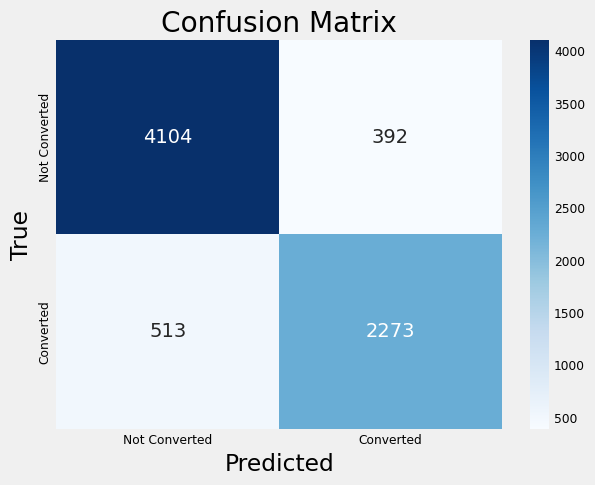

In [42]:
# Define class labels (optional)
class_labels = ['Not Converted', 'Converted']

# Create a figure and axis
fig, ax = plt.subplots()

# Create a heatmap using seaborn
sns.heatmap(randformatrix_train, annot=True, cmap='Blues', fmt='d', xticklabels=class_labels, yticklabels=class_labels, ax=ax)

# Set axis labels and title
ax.set_xlabel('Predicted')
ax.set_ylabel('True')
ax.set_title('Confusion Matrix')

# Show the plot
plt.show()

In [43]:
calculate_percentages_confusion_matrix(randformatrix_train)

True Positive Percentage: 31.213952210931062%
True Negative Percentage: 56.358143367206814%
False Positive Percentage: 5.383136500961275%
False Negative Percentage: 7.044767920900852%
Sensitivity (True Positive Rate): 81.586503948313%
Specificity (True Negative Rate): 91.28113879003558%


In [44]:
# Assuming you have the true labels in y_true and the predicted labels in y_pred
randformatrix_test = confusion_matrix(y_test, y_pred)

print(randformatrix_test)

[[1018  128]
 [ 155  520]]


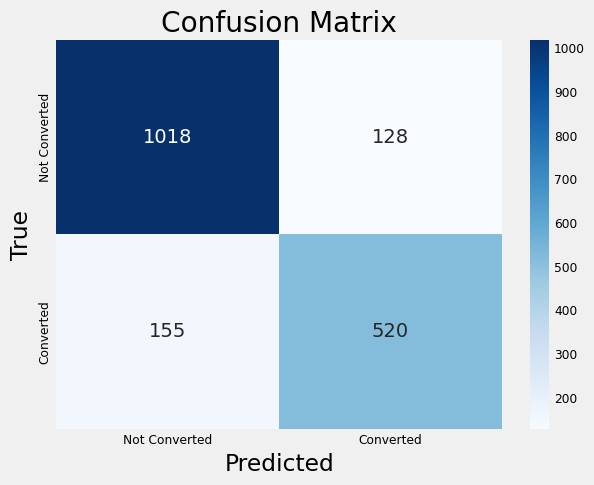

In [45]:
# Define class labels (optional)
class_labels = ['Not Converted', 'Converted']

# Create a figure and axis
fig, ax = plt.subplots()

# Create a heatmap using seaborn
sns.heatmap(randformatrix_test, annot=True, cmap='Blues', fmt='d', xticklabels=class_labels, yticklabels=class_labels, ax=ax)

# Set axis labels and title
ax.set_xlabel('Predicted')
ax.set_ylabel('True')
ax.set_title('Confusion Matrix')

# Show the plot
plt.show()

In [46]:
calculate_percentages_confusion_matrix(randformatrix_test)

True Positive Percentage: 28.555738605162002%
True Negative Percentage: 55.90334980779791%
False Positive Percentage: 7.029104887424492%
False Negative Percentage: 8.511806699615596%
Sensitivity (True Positive Rate): 77.03703703703704%
Specificity (True Negative Rate): 88.8307155322862%


#### K-fold Testing

In [47]:

# Instantiate a logistic regression model
randomForestModel = RandomForestClassifier(n_estimators=100,max_features="log2",
                            max_depth=None, random_state=72,
                            min_samples_leaf=2, min_samples_split=10)

# Set the number of folds
k = 5

# Instantiate a KFold object
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Initialize an empty list to store validation accuracy scores
accuracy_scores = []
precision_scores = []
f1_scores = []
recall_scores = []
auc_scores = []

# Loop over the folds
for train_idx, val_idx in kf.split(X_train,y_train):
    # Split the data into training and validation sets
    X_train_k, y_train_k = X_train.iloc[train_idx], y_train.iloc[train_idx]
    X_val_k, y_val_k = X_train.iloc[val_idx], y_train.iloc[val_idx]
    
    # Fit the model to the training data
    randomForestModel.fit(X_train_k, y_train_k)
    
    # Make predictions on the validation set
    y_pred = randomForestModel.predict(X_val_k)
    
    # Calculate the accuracy, precision, recall, f1, auc of the model on the validation set
    accuracy = accuracy_score(y_val_k, y_pred)
    precision = precision_score(y_val_k, y_pred)
    recall = recall_score(y_val_k, y_pred)
    f1 = f1_score(y_val_k, y_pred)
    fp, tp, th = roc_curve(y_val_k, y_pred)
    
    # Append the accuracy score to the list
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    auc_scores.append(round(auc(fp, tp),5))



# Calculate the mean and standard deviation of the validation accuracy scores, precision, recall, f1, auc
mean_accuracy = sum(accuracy_scores) / k
std_accuracy = np.std(accuracy_scores)

mean_precision = sum(precision_scores) / k
std_precision = np.std(precision_scores)

mean_recall = sum(recall_scores) / k
std_recall = np.std(recall_scores)

mean_f1 = sum(f1_scores) / k
std_f1 = np.std(f1_scores)  

mean_auc = sum(auc_scores) / k
std_auc = np.std(auc_scores)


# Print the mean and standard deviation of the validation accuracy scores, precision, recall, f1, auc
print(f"Mean accuracy = {mean_accuracy:.4f} +/- {std_accuracy:.4f}")
print(f"Mean precision = {mean_precision:.4f} +/- {std_precision:.4f}")
print(f"Mean recall = {mean_recall:.4f} +/- {std_recall:.4f}")
print(f"Mean f1 = {mean_f1:.4f} +/- {std_f1:.4f}")
print(f"Mean auc = {mean_auc:.4f} +/- {std_auc:.4f}")




Mean accuracy = 0.8275 +/- 0.0050
Mean precision = 0.7888 +/- 0.0124
Mean recall = 0.7504 +/- 0.0153
Mean f1 = 0.7690 +/- 0.0073
Mean auc = 0.8128 +/- 0.0052


#### Balancing Dataset

##### Upsampling Dataset

using the same up sampled data as processed above

In [524]:
upsample_length = len(X_minority) + 1400

print("majority class new len = ",len(majority_class))
print("minority class len = ",upsample_length)

# print percentages of each class
total = upsample_length + len(majority_class)
print("Percentage of majority class = ",(len(majority_class)/total)*100)
print("Percentage of minority class = ",(upsample_length/total)*100)

print("Total number of records = ",total)

majority class new len =  5642
minority class len =  4861
Percentage of majority class =  53.71798533752261
Percentage of minority class =  46.28201466247739
Total number of records =  10503


In [525]:
X_upsampled, Y_upsampled = resample(X_minority, Y_minority, n_samples=upsample_length, random_state=42)

print(len(X_upsampled))
print(len(Y_upsampled))
X_upsampled = np.concatenate((X_upsampled, X_majority), axis=0)
Y_upsampled = np.concatenate((Y_upsampled, Y_majority), axis=0)

print(len(X_upsampled))
print(len(Y_upsampled))


# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X_upsampled, Y_upsampled, train_size=0.8, test_size=0.2, random_state=96)

4861
4861
10503
10503


In [526]:
randomForestModel = RandomForestClassifier(n_estimators=200,max_features="auto",
                                max_depth=None, random_state=96,
                                min_samples_leaf=4, min_samples_split=2)

randomForestModel.fit(X_train, y_train)

y_pred = randomForestModel.predict(X_test)
y_pred_train = randomForestModel.predict(X_train)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
fp, tp, th = roc_curve(y_test, y_pred)
fp1, tp1, th1 = roc_curve(y_train, y_pred_train)

print("Train Accuracy:", randomForestModel.score(X_train, y_train))
print("Test Accuracy:", accuracy)
print("\nTrain Precision:", precision_score(y_train, y_pred_train))
print("Test Precision:", precision)
print("\nTrain Recall:", recall_score(y_train,y_pred_train))
print("Test Recall:", recall)
print("\nTrain F1 Score:", f1_score(y_train, y_pred_train))
print("Test F1 Score:", f1)
print("\nTrain AUC:", round(auc(fp1, tp1),5))
print("Test AUC:", round(auc(fp, tp),5))

c:\Users\umara\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Train Accuracy: 0.8768150440371341
Test Accuracy: 0.8448357924797716

Train Precision: 0.8669460450497642
Test Precision: 0.843503937007874

Train Recall: 0.8626531144123013
Test Recall: 0.8369140625

Train F1 Score: 0.8647942521227956
Test F1 Score: 0.8401960784313726

Train AUC: 0.87569
Test AUC: 0.84464


#####  Finding Best Hyperparameters for upsampled data

In [527]:
clf = [
        RandomForestClassifier(n_estimators=100,max_features="auto",
                            max_depth=None, random_state=72,
                            min_samples_leaf=4, min_samples_split=2),
        RandomForestClassifier(n_estimators=200,max_features="auto",
                            max_depth=None, random_state=72,
                            min_samples_leaf=4, min_samples_split=2),
        RandomForestClassifier(n_estimators=300,max_features="auto",
                            max_depth=None, random_state=72,
                            min_samples_leaf=4, min_samples_split=2),


        RandomForestClassifier(n_estimators=100,max_features="auto",
                            max_depth=10, random_state=72,
                            min_samples_leaf=1, min_samples_split=2),
        RandomForestClassifier(n_estimators=200,max_features="auto",
                            max_depth=10, random_state=72,
                            min_samples_leaf=1, min_samples_split=2),
        RandomForestClassifier(n_estimators=300,max_features="auto",
                            max_depth=10, random_state=72,
                            min_samples_leaf=1, min_samples_split=2),


        RandomForestClassifier(n_estimators=100,max_features="auto",
                            max_depth=10, random_state=72,
                            min_samples_leaf=1, min_samples_split=10),
        RandomForestClassifier(n_estimators=200,max_features="auto",
                            max_depth=10, random_state=72,
                            min_samples_leaf=2, min_samples_split=2),


        RandomForestClassifier(n_estimators=100,max_features="auto",
                            max_depth=10, random_state=72,
                            min_samples_leaf=2, min_samples_split=5),
        RandomForestClassifier(n_estimators=200,max_features="auto",
                            max_depth=10, random_state=72,
                            min_samples_leaf=2, min_samples_split=5),


        RandomForestClassifier(n_estimators=100,max_features="auto",
                            max_depth=10, random_state=72,
                            min_samples_leaf=2, min_samples_split=10),
        RandomForestClassifier(n_estimators=200,max_features="auto",
                            max_depth=10, random_state=72,
                            min_samples_leaf=2, min_samples_split=10),
        RandomForestClassifier(n_estimators=300,max_features="auto",
                            max_depth=10, random_state=72,
                            min_samples_leaf=2, min_samples_split=10),


        RandomForestClassifier(n_estimators=200,max_features="sqrt",
                            max_depth=None, random_state=72,
                            min_samples_leaf=1, min_samples_split=2),
        RandomForestClassifier(n_estimators=300,max_features="sqrt",
                            max_depth=None, random_state=72,
                            min_samples_leaf=1, min_samples_split=2),


        RandomForestClassifier(n_estimators=300,max_features="sqrt",
                            max_depth=None, random_state=72,
                            min_samples_leaf=1, min_samples_split=5),
        RandomForestClassifier(n_estimators=200,max_features="sqrt",
                            max_depth=None, random_state=72,
                            min_samples_leaf=1, min_samples_split=10),
        RandomForestClassifier(n_estimators=300,max_features="sqrt",
                            max_depth=None, random_state=72,
                            min_samples_leaf=1, min_samples_split=10),


        RandomForestClassifier(n_estimators=300,max_features="sqrt",
                            max_depth=None, random_state=72,
                            min_samples_leaf=2, min_samples_split=2),
        RandomForestClassifier(n_estimators=200,max_features="sqrt",
                            max_depth=None, random_state=72,
                            min_samples_leaf=2, min_samples_split=5),


        RandomForestClassifier(n_estimators=100,max_features="log2",
                            max_depth=None, random_state=72,
                            min_samples_leaf=1, min_samples_split=2),
        RandomForestClassifier(n_estimators=200,max_features="log2",
                            max_depth=None, random_state=72,
                            min_samples_leaf=1, min_samples_split=2),
        RandomForestClassifier(n_estimators=300,max_features="log2",
                            max_depth=None, random_state=72,
                            min_samples_leaf=1, min_samples_split=2),


        RandomForestClassifier(n_estimators=100,max_features="log2",
                            max_depth=None, random_state=72,
                            min_samples_leaf=1, min_samples_split=5),
        RandomForestClassifier(n_estimators=300,max_features="log2",
                            max_depth=None, random_state=72,
                            min_samples_leaf=1, min_samples_split=5),
        RandomForestClassifier(n_estimators=100,max_features="log2",
                            max_depth=None, random_state=72,
                            min_samples_leaf=1, min_samples_split=10),
        RandomForestClassifier(n_estimators=200,max_features="log2",
                            max_depth=None, random_state=72,
                            min_samples_leaf=1, min_samples_split=10),


        RandomForestClassifier(n_estimators=300,max_features="log2",
                            max_depth=None, random_state=72,
                            min_samples_leaf=2, min_samples_split=10),
        RandomForestClassifier(n_estimators=100,max_features="log2",
                            max_depth=None, random_state=72,
                            min_samples_leaf=2, min_samples_split=2),
        RandomForestClassifier(n_estimators=300,max_features="log2",
                            max_depth=None, random_state=72,
                            min_samples_leaf=2, min_samples_split=5),
        RandomForestClassifier(n_estimators=100,max_features="log2",
                            max_depth=None, random_state=72,
                            min_samples_leaf=2, min_samples_split=10)
            
    ]
clf_columns = []
clf_compare = pd.DataFrame(columns = clf_columns)

row_index = 0
for alg in clf:
    
    alg_fit = alg.fit(X_train, y_train)
    predicted = alg_fit.predict(X_test)
    y_train_pred = alg_fit.predict(X_train)
    
    fp_tr, tp_tr, th_tr = roc_curve(y_train, y_train_pred)
    fp, tp, th = roc_curve(y_test, predicted)
    clf_name = alg.__class__.__name__
    clf_compare.loc[row_index, 'Train Accuracy'] = round(alg.score(X_train, y_train), 5)
    clf_compare.loc[row_index, 'Train Precision'] = round(precision_score(y_train, y_train_pred),5)
    clf_compare.loc[row_index, 'Train F1'] = round(f1_score(y_train, y_train_pred),5)
    clf_compare.loc[row_index, 'Train Recall'] = round(recall_score(y_train, y_train_pred),5)
    clf_compare.loc[row_index, "Train AUC"] = round(auc(fp_tr,tp_tr),5)

    clf_compare.loc[row_index, 'Test Accuracy'] = round(alg.score(X_test, y_test), 5)
    clf_compare.loc[row_index, 'Test Precision'] = round(precision_score(y_test, predicted),5)
    clf_compare.loc[row_index, 'Test F1'] = round(f1_score(y_test, predicted),5)
    clf_compare.loc[row_index, 'Test Recall'] = round(recall_score(y_test, predicted),5)
    clf_compare.loc[row_index, 'Test AUC'] = round(auc(fp, tp),5)

    row_index+=1
    
clf_compare.sort_values(by = ['Test Accuracy'], ascending = False, inplace = True)    
clf_compare

c:\Users\umara\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
c:\Users\umara\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
c:\Users\umara\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicit

,Train Accuracy,Train Precision,Train F1,Train Recall,Train AUC,Test Accuracy,Test Precision,Test F1,Test Recall,Test AUC
21,0.97274,0.97725,0.96994,0.96273,0.97195,0.87911,0.86252,0.87824,0.89453,0.87948
13,0.97274,0.97725,0.96994,0.96273,0.97195,0.87911,0.86252,0.87824,0.89453,0.87948
22,0.97274,0.97725,0.96994,0.96273,0.97195,0.87863,0.86036,0.87805,0.89648,0.87907
14,0.97274,0.97725,0.96994,0.96273,0.97195,0.87863,0.86036,0.87805,0.89648,0.87907
20,0.97274,0.97725,0.96994,0.96273,0.97195,0.87815,0.86295,0.87704,0.89160,0.87848
15,0.95620,0.95971,0.95164,0.94371,0.95520,0.87006,0.85796,0.86831,0.87891,0.87028
24,0.95620,0.95971,0.95164,0.94371,0.95520,0.87006,0.85796,0.86831,0.87891,0.87028
23,0.95525,0.95793,0.95063,0.94345,0.95431,0.86768,0.85728,0.86557,0.87402,0.86784
16,0.91883,0.90985,0.91127,0.91269,0.91834,0.86149,0.85139,0.85922,0.86719,0.86163
26,0.91883,0.90985,0.91127,0.91269,0.91834,0.86149,0.85139,0.85922,0.86719,0.86163


In [528]:
clf_compare.sort_values(by = ['Test AUC'], ascending = False, inplace = True)    
clf_compare

,Train Accuracy,Train Precision,Train F1,Train Recall,Train AUC,Test Accuracy,Test Precision,Test F1,Test Recall,Test AUC
21,0.97274,0.97725,0.96994,0.96273,0.97195,0.87911,0.86252,0.87824,0.89453,0.87948
13,0.97274,0.97725,0.96994,0.96273,0.97195,0.87911,0.86252,0.87824,0.89453,0.87948
22,0.97274,0.97725,0.96994,0.96273,0.97195,0.87863,0.86036,0.87805,0.89648,0.87907
14,0.97274,0.97725,0.96994,0.96273,0.97195,0.87863,0.86036,0.87805,0.89648,0.87907
20,0.97274,0.97725,0.96994,0.96273,0.97195,0.87815,0.86295,0.87704,0.89160,0.87848
15,0.95620,0.95971,0.95164,0.94371,0.95520,0.87006,0.85796,0.86831,0.87891,0.87028
24,0.95620,0.95971,0.95164,0.94371,0.95520,0.87006,0.85796,0.86831,0.87891,0.87028
23,0.95525,0.95793,0.95063,0.94345,0.95431,0.86768,0.85728,0.86557,0.87402,0.86784
16,0.91883,0.90985,0.91127,0.91269,0.91834,0.86149,0.85139,0.85922,0.86719,0.86163
26,0.91883,0.90985,0.91127,0.91269,0.91834,0.86149,0.85139,0.85922,0.86719,0.86163


In [529]:
clf_compare.sort_values(by = ['Test F1'], ascending = False, inplace = True)    
clf_compare

,Train Accuracy,Train Precision,Train F1,Train Recall,Train AUC,Test Accuracy,Test Precision,Test F1,Test Recall,Test AUC
21,0.97274,0.97725,0.96994,0.96273,0.97195,0.87911,0.86252,0.87824,0.89453,0.87948
13,0.97274,0.97725,0.96994,0.96273,0.97195,0.87911,0.86252,0.87824,0.89453,0.87948
22,0.97274,0.97725,0.96994,0.96273,0.97195,0.87863,0.86036,0.87805,0.89648,0.87907
14,0.97274,0.97725,0.96994,0.96273,0.97195,0.87863,0.86036,0.87805,0.89648,0.87907
20,0.97274,0.97725,0.96994,0.96273,0.97195,0.87815,0.86295,0.87704,0.89160,0.87848
15,0.95620,0.95971,0.95164,0.94371,0.95520,0.87006,0.85796,0.86831,0.87891,0.87028
24,0.95620,0.95971,0.95164,0.94371,0.95520,0.87006,0.85796,0.86831,0.87891,0.87028
23,0.95525,0.95793,0.95063,0.94345,0.95431,0.86768,0.85728,0.86557,0.87402,0.86784
16,0.91883,0.90985,0.91127,0.91269,0.91834,0.86149,0.85139,0.85922,0.86719,0.86163
26,0.91883,0.90985,0.91127,0.91269,0.91834,0.86149,0.85139,0.85922,0.86719,0.86163


In [530]:
clf_compare.sort_values(by = ['Test Recall'], ascending = False, inplace = True)    
clf_compare

,Train Accuracy,Train Precision,Train F1,Train Recall,Train AUC,Test Accuracy,Test Precision,Test F1,Test Recall,Test AUC
22,0.97274,0.97725,0.96994,0.96273,0.97195,0.87863,0.86036,0.87805,0.89648,0.87907
14,0.97274,0.97725,0.96994,0.96273,0.97195,0.87863,0.86036,0.87805,0.89648,0.87907
21,0.97274,0.97725,0.96994,0.96273,0.97195,0.87911,0.86252,0.87824,0.89453,0.87948
13,0.97274,0.97725,0.96994,0.96273,0.97195,0.87911,0.86252,0.87824,0.89453,0.87948
20,0.97274,0.97725,0.96994,0.96273,0.97195,0.87815,0.86295,0.87704,0.89160,0.87848
15,0.95620,0.95971,0.95164,0.94371,0.95520,0.87006,0.85796,0.86831,0.87891,0.87028
24,0.95620,0.95971,0.95164,0.94371,0.95520,0.87006,0.85796,0.86831,0.87891,0.87028
23,0.95525,0.95793,0.95063,0.94345,0.95431,0.86768,0.85728,0.86557,0.87402,0.86784
17,0.92050,0.91124,0.91313,0.91504,0.92006,0.86102,0.84990,0.85894,0.86816,0.86119
16,0.91883,0.90985,0.91127,0.91269,0.91834,0.86149,0.85139,0.85922,0.86719,0.86163


##### Training upsampled with best parameters

In [531]:
randomForestModel = RandomForestClassifier(n_estimators=300,max_features="sqrt",
                            max_depth=None, random_state=72,
                            min_samples_leaf=1, min_samples_split=2)

randomForestModel.fit(X_train, y_train)

y_pred = randomForestModel.predict(X_test)
y_pred_train = randomForestModel.predict(X_train)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
fp, tp, th = roc_curve(y_test, y_pred)
fp1, tp1, th1 = roc_curve(y_train, y_pred_train)

print("Train Accuracy:", randomForestModel.score(X_train, y_train))
print("Test Accuracy:", accuracy)
print("\nTrain Precision:", precision_score(y_train, y_pred_train))
print("Test Precision:", precision)
print("\nTrain Recall:", recall_score(y_train,y_pred_train))
print("Test Recall:", recall)
print("\nTrain F1 Score:", f1_score(y_train, y_pred_train))
print("Test F1 Score:", f1)
print("\nTrain AUC:", round(auc(fp1, tp1),5))
print("Test AUC:", round(auc(fp, tp),5))

Train Accuracy: 0.9727445846227089
Test Accuracy: 0.8786292241789624

Train Precision: 0.9772486772486773
Test Precision: 0.8603561387066542

Train Recall: 0.9627313004951785
Test Recall: 0.896484375

Train F1 Score: 0.9699356702113693
Test F1 Score: 0.878048780487805

Train AUC: 0.97195
Test AUC: 0.87907


In [532]:
randfor_up_matrix_train = confusion_matrix(y_train,y_pred_train)

print(randfor_up_matrix_train)

[[4479   86]
 [ 143 3694]]


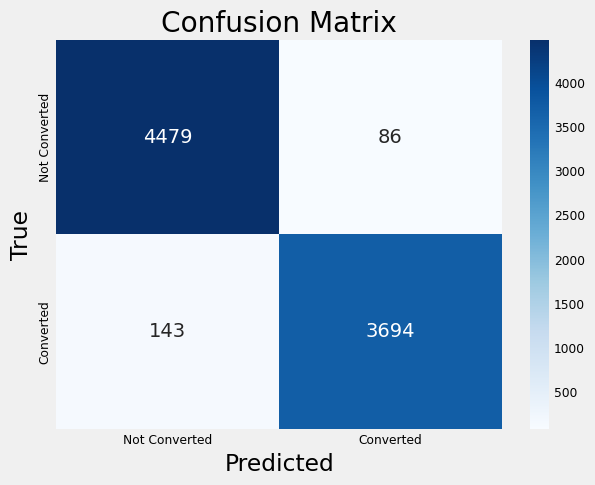

In [533]:
# Define class labels (optional)
class_labels = ['Not Converted', 'Converted']

# Create a figure and axis
fig, ax = plt.subplots()

# Create a heatmap using seaborn
sns.heatmap(randfor_up_matrix_train, annot=True, cmap='Blues', fmt='d', xticklabels=class_labels, yticklabels=class_labels, ax=ax)

# Set axis labels and title
ax.set_xlabel('Predicted')
ax.set_ylabel('True')
ax.set_title('Confusion Matrix')

# Show the plot
plt.show()

In [534]:
calculate_percentages_confusion_matrix(randfor_up_matrix_train)

True Positive Percentage: 43.96572244703642%
True Negative Percentage: 53.30873601523447%
False Positive Percentage: 1.0235658176624614%
False Negative Percentage: 1.7019757200666508%
Sensitivity (True Positive Rate): 96.27313004951785%
Specificity (True Negative Rate): 98.11610076670317%


In [535]:
randfor_up_matrix_test = confusion_matrix(y_test,y_pred)

print(randfor_up_matrix_test)

[[928 149]
 [106 918]]


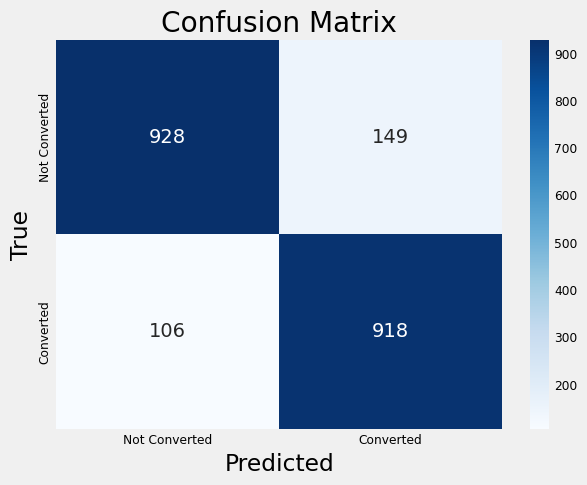

In [536]:
# Define class labels (optional)
class_labels = ['Not Converted', 'Converted']

# Create a figure and axis
fig, ax = plt.subplots()

# Create a heatmap using seaborn
sns.heatmap(randfor_up_matrix_test, annot=True, cmap='Blues', fmt='d', xticklabels=class_labels, yticklabels=class_labels, ax=ax)

# Set axis labels and title
ax.set_xlabel('Predicted')
ax.set_ylabel('True')
ax.set_title('Confusion Matrix')

# Show the plot
plt.show()

In [537]:
calculate_percentages_confusion_matrix(randfor_up_matrix_test)

True Positive Percentage: 43.69347929557353%
True Negative Percentage: 44.169443122322704%
False Positive Percentage: 7.091861018562589%
False Negative Percentage: 5.045216563541171%
Sensitivity (True Positive Rate): 89.6484375%
Specificity (True Negative Rate): 86.1652739090065%


##### k-fold Testing for Random Forest Up sampled

In [538]:

# Instantiate a logistic regression model
randomForestModel = RandomForestClassifier(n_estimators=300,max_features="sqrt",
                            max_depth=None, random_state=72,
                            min_samples_leaf=1, min_samples_split=2)

# Set the number of folds
k = 5

# Instantiate a KFold object
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Initialize an empty list to store validation accuracy scores
accuracy_scores = []
precision_scores = []
f1_scores = []
recall_scores = []
auc_scores = []

# Loop over the folds
for train_idx, val_idx in kf.split(X_train,y_train):
    # Split the data into training and validation sets
    X_train_k, y_train_k = X_train[train_idx], y_train[train_idx]
    X_val_k, y_val_k = X_train[val_idx], y_train[val_idx]
    
    # Fit the model to the training data
    randomForestModel.fit(X_train_k, y_train_k)
    
    # Make predictions on the validation set
    y_pred = randomForestModel.predict(X_val_k)
    
    # Calculate the accuracy, precision, recall, f1, auc of the model on the validation set
    accuracy = accuracy_score(y_val_k, y_pred)
    precision = precision_score(y_val_k, y_pred)
    recall = recall_score(y_val_k, y_pred)
    f1 = f1_score(y_val_k, y_pred)
    fp, tp, th = roc_curve(y_val_k, y_pred)
    
    # Append the accuracy score to the list
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    auc_scores.append(round(auc(fp, tp),5))



# Calculate the mean and standard deviation of the validation accuracy scores, precision, recall, f1, auc
mean_accuracy = sum(accuracy_scores) / k
std_accuracy = np.std(accuracy_scores)

mean_precision = sum(precision_scores) / k
std_precision = np.std(precision_scores)

mean_recall = sum(recall_scores) / k
std_recall = np.std(recall_scores)

mean_f1 = sum(f1_scores) / k
std_f1 = np.std(f1_scores)  

mean_auc = sum(auc_scores) / k
std_auc = np.std(auc_scores)


# Print the mean and standard deviation of the validation accuracy scores, precision, recall, f1, auc
print(f"Mean accuracy = {mean_accuracy:.4f} +/- {std_accuracy:.4f}")
print(f"Mean precision = {mean_precision:.4f} +/- {std_precision:.4f}")
print(f"Mean recall = {mean_recall:.4f} +/- {std_recall:.4f}")
print(f"Mean f1 = {mean_f1:.4f} +/- {std_f1:.4f}")
print(f"Mean auc = {mean_auc:.4f} +/- {std_auc:.4f}")




Mean accuracy = 0.8710 +/- 0.0052
Mean precision = 0.8378 +/- 0.0178
Mean recall = 0.8904 +/- 0.0220
Mean f1 = 0.8629 +/- 0.0076
Mean auc = 0.8728 +/- 0.0062


##### Down sampling dataset

In [74]:
downsample_length = len(X_majority) - 1300

print("majority class new len = ",downsample_length)
print("minority class len = ",len(X_minority))

# print percentages of each class
total = downsample_length + len(X_minority)
print("Percentage of majority class = ",(downsample_length/total)*100)
print("Percentage of minority class = ",(len(X_minority)/total)*100)

majority class new len =  4342
minority class len =  3461
Percentage of majority class =  55.64526464180444
Percentage of minority class =  44.35473535819557


In [75]:

X_downsampled, Y_downsampled = resample(X_majority, Y_majority, n_samples=downsample_length, random_state=48)

print(len(X_downsampled))
print(len(Y_downsampled))


X_downsampled = np.concatenate((X_downsampled, X_minority), axis=0)
Y_downsampled = np.concatenate((Y_downsampled, Y_minority), axis=0)

print(len(X_downsampled))
print(len(Y_downsampled))

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X_downsampled, Y_downsampled, train_size=0.8, test_size=0.2, random_state=48)




4342
4342
7803
7803


In [541]:
randomForestModel = RandomForestClassifier(n_estimators=200,max_features="auto",
                                max_depth=None, random_state=96,
                                min_samples_leaf=4, min_samples_split=2)

randomForestModel.fit(X_train, y_train)

y_pred = randomForestModel.predict(X_test)
y_pred_train = randomForestModel.predict(X_train)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
fp, tp, th = roc_curve(y_test, y_pred)
fp1, tp1, th1 = roc_curve(y_train, y_pred_train)

print("Train Accuracy:", randomForestModel.score(X_train, y_train))
print("Test Accuracy:", accuracy)
print("\nTrain Precision:", precision_score(y_train, y_pred_train))
print("Test Precision:", precision)
print("\nTrain Recall:", recall_score(y_train,y_pred_train))
print("Test Recall:", recall)
print("\nTrain F1 Score:", f1_score(y_train, y_pred_train))
print("Test F1 Score:", f1)
print("\nTrain AUC:", round(auc(fp1, tp1),5))
print("Test AUC:", round(auc(fp, tp),5))

c:\Users\umara\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Train Accuracy: 0.8670297981416213
Test Accuracy: 0.8379244074311338

Train Precision: 0.8682497127537342
Test Precision: 0.8549141965678627

Train Recall: 0.8234653105702869
Test Recall: 0.7740112994350282

Train F1 Score: 0.8452647278150633
Test F1 Score: 0.8124536693847294

Train AUC: 0.86243
Test AUC: 0.83249


#####  Finding Best Hyperparameters for down sampled data

In [542]:
clf = [
        RandomForestClassifier(n_estimators=100,max_features="auto",
                            max_depth=None, random_state=72,
                            min_samples_leaf=4, min_samples_split=2),
        RandomForestClassifier(n_estimators=200,max_features="auto",
                            max_depth=None, random_state=72,
                            min_samples_leaf=4, min_samples_split=2),
        RandomForestClassifier(n_estimators=300,max_features="auto",
                            max_depth=None, random_state=72,
                            min_samples_leaf=4, min_samples_split=2),


        RandomForestClassifier(n_estimators=100,max_features="auto",
                            max_depth=10, random_state=72,
                            min_samples_leaf=1, min_samples_split=2),
        RandomForestClassifier(n_estimators=200,max_features="auto",
                            max_depth=10, random_state=72,
                            min_samples_leaf=1, min_samples_split=2),
        RandomForestClassifier(n_estimators=300,max_features="auto",
                            max_depth=10, random_state=72,
                            min_samples_leaf=1, min_samples_split=2),


        RandomForestClassifier(n_estimators=100,max_features="auto",
                            max_depth=10, random_state=72,
                            min_samples_leaf=1, min_samples_split=10),
        RandomForestClassifier(n_estimators=200,max_features="auto",
                            max_depth=10, random_state=72,
                            min_samples_leaf=2, min_samples_split=2),


        RandomForestClassifier(n_estimators=100,max_features="auto",
                            max_depth=10, random_state=72,
                            min_samples_leaf=2, min_samples_split=5),
        RandomForestClassifier(n_estimators=200,max_features="auto",
                            max_depth=10, random_state=72,
                            min_samples_leaf=2, min_samples_split=5),


        RandomForestClassifier(n_estimators=100,max_features="auto",
                            max_depth=10, random_state=72,
                            min_samples_leaf=2, min_samples_split=10),
        RandomForestClassifier(n_estimators=200,max_features="auto",
                            max_depth=10, random_state=72,
                            min_samples_leaf=2, min_samples_split=10),
        RandomForestClassifier(n_estimators=300,max_features="auto",
                            max_depth=10, random_state=72,
                            min_samples_leaf=2, min_samples_split=10),


        RandomForestClassifier(n_estimators=200,max_features="sqrt",
                            max_depth=None, random_state=72,
                            min_samples_leaf=1, min_samples_split=2),
        RandomForestClassifier(n_estimators=300,max_features="sqrt",
                            max_depth=None, random_state=72,
                            min_samples_leaf=1, min_samples_split=2),


        RandomForestClassifier(n_estimators=300,max_features="sqrt",
                            max_depth=None, random_state=72,
                            min_samples_leaf=1, min_samples_split=5),
        RandomForestClassifier(n_estimators=200,max_features="sqrt",
                            max_depth=None, random_state=72,
                            min_samples_leaf=1, min_samples_split=10),
        RandomForestClassifier(n_estimators=300,max_features="sqrt",
                            max_depth=None, random_state=72,
                            min_samples_leaf=1, min_samples_split=10),


        RandomForestClassifier(n_estimators=300,max_features="sqrt",
                            max_depth=None, random_state=72,
                            min_samples_leaf=2, min_samples_split=2),
        RandomForestClassifier(n_estimators=200,max_features="sqrt",
                            max_depth=None, random_state=72,
                            min_samples_leaf=2, min_samples_split=5),


        RandomForestClassifier(n_estimators=100,max_features="log2",
                            max_depth=None, random_state=72,
                            min_samples_leaf=1, min_samples_split=2),
        RandomForestClassifier(n_estimators=200,max_features="log2",
                            max_depth=None, random_state=72,
                            min_samples_leaf=1, min_samples_split=2),
        RandomForestClassifier(n_estimators=300,max_features="log2",
                            max_depth=None, random_state=72,
                            min_samples_leaf=1, min_samples_split=2),


        RandomForestClassifier(n_estimators=100,max_features="log2",
                            max_depth=None, random_state=72,
                            min_samples_leaf=1, min_samples_split=5),
        RandomForestClassifier(n_estimators=300,max_features="log2",
                            max_depth=None, random_state=72,
                            min_samples_leaf=1, min_samples_split=5),
        RandomForestClassifier(n_estimators=100,max_features="log2",
                            max_depth=None, random_state=72,
                            min_samples_leaf=1, min_samples_split=10),
        RandomForestClassifier(n_estimators=200,max_features="log2",
                            max_depth=None, random_state=72,
                            min_samples_leaf=1, min_samples_split=10),


        RandomForestClassifier(n_estimators=300,max_features="log2",
                            max_depth=None, random_state=72,
                            min_samples_leaf=2, min_samples_split=10),
        RandomForestClassifier(n_estimators=100,max_features="log2",
                            max_depth=None, random_state=72,
                            min_samples_leaf=2, min_samples_split=2),
        RandomForestClassifier(n_estimators=300,max_features="log2",
                            max_depth=None, random_state=72,
                            min_samples_leaf=2, min_samples_split=5),
        RandomForestClassifier(n_estimators=100,max_features="log2",
                            max_depth=None, random_state=72,
                            min_samples_leaf=2, min_samples_split=10)
            
    ]
clf_columns = []
clf_compare = pd.DataFrame(columns = clf_columns)

row_index = 0
for alg in clf:
    
    alg_fit = alg.fit(X_train, y_train)
    predicted = alg_fit.predict(X_test)
    y_train_pred = alg_fit.predict(X_train)
    
    fp_tr, tp_tr, th_tr = roc_curve(y_train, y_train_pred)
    fp, tp, th = roc_curve(y_test, predicted)
    clf_name = alg.__class__.__name__
    clf_compare.loc[row_index, 'Train Accuracy'] = round(alg.score(X_train, y_train), 5)
    clf_compare.loc[row_index, 'Train Precision'] = round(precision_score(y_train, y_train_pred),5)
    clf_compare.loc[row_index, 'Train F1'] = round(f1_score(y_train, y_train_pred),5)
    clf_compare.loc[row_index, 'Train Recall'] = round(recall_score(y_train, y_train_pred),5)
    clf_compare.loc[row_index, "Train AUC"] = round(auc(fp_tr,tp_tr),5)

    clf_compare.loc[row_index, 'Test Accuracy'] = round(alg.score(X_test, y_test), 5)
    clf_compare.loc[row_index, 'Test Precision'] = round(precision_score(y_test, predicted),5)
    clf_compare.loc[row_index, 'Test F1'] = round(f1_score(y_test, predicted),5)
    clf_compare.loc[row_index, 'Test Recall'] = round(recall_score(y_test, predicted),5)
    clf_compare.loc[row_index, 'Test AUC'] = round(auc(fp, tp),5)

    row_index+=1
    
clf_compare.sort_values(by = ['Test Accuracy'], ascending = False, inplace = True)    
clf_compare

c:\Users\umara\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
c:\Users\umara\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
c:\Users\umara\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicit

,Train Accuracy,Train Precision,Train F1,Train Recall,Train AUC,Test Accuracy,Test Precision,Test F1,Test Recall,Test AUC
15,0.94809,0.95065,0.94053,0.93062,0.94625,0.84946,0.86781,0.82605,0.78814,0.84424
24,0.94809,0.95065,0.94053,0.93062,0.94625,0.84946,0.86781,0.82605,0.78814,0.84424
23,0.94601,0.95007,0.93802,0.92626,0.94393,0.84881,0.86420,0.82596,0.79096,0.84390
28,0.91685,0.91867,0.90426,0.89030,0.91405,0.84625,0.86449,0.82222,0.78390,0.84095
14,0.97405,0.97576,0.97042,0.96513,0.97311,0.84497,0.86520,0.82021,0.77966,0.83942
5,0.86671,0.85587,0.84740,0.83908,0.86380,0.84497,0.85627,0.82232,0.79096,0.84038
7,0.85806,0.84871,0.83683,0.82528,0.85460,0.84497,0.85846,0.82180,0.78814,0.84014
22,0.97405,0.97576,0.97042,0.96513,0.97311,0.84497,0.86520,0.82021,0.77966,0.83942
20,0.97405,0.97472,0.97045,0.96622,0.97322,0.84497,0.86406,0.82047,0.78107,0.83954
10,0.85197,0.84238,0.82965,0.81729,0.84831,0.84497,0.85846,0.82180,0.78814,0.84014


In [543]:
clf_compare.sort_values(by = ['Test AUC'], ascending = False, inplace = True)    
clf_compare

,Train Accuracy,Train Precision,Train F1,Train Recall,Train AUC,Test Accuracy,Test Precision,Test F1,Test Recall,Test AUC
15,0.94809,0.95065,0.94053,0.93062,0.94625,0.84946,0.86781,0.82605,0.78814,0.84424
24,0.94809,0.95065,0.94053,0.93062,0.94625,0.84946,0.86781,0.82605,0.78814,0.84424
23,0.94601,0.95007,0.93802,0.92626,0.94393,0.84881,0.86420,0.82596,0.79096,0.84390
28,0.91685,0.91867,0.90426,0.89030,0.91405,0.84625,0.86449,0.82222,0.78390,0.84095
5,0.86671,0.85587,0.84740,0.83908,0.86380,0.84497,0.85627,0.82232,0.79096,0.84038
11,0.85389,0.84463,0.83186,0.81947,0.85026,0.84497,0.85736,0.82206,0.78955,0.84026
7,0.85806,0.84871,0.83683,0.82528,0.85460,0.84497,0.85846,0.82180,0.78814,0.84014
10,0.85197,0.84238,0.82965,0.81729,0.84831,0.84497,0.85846,0.82180,0.78814,0.84014
26,0.91413,0.91720,0.90092,0.88522,0.91108,0.84433,0.85714,0.82119,0.78814,0.83955
16,0.91413,0.91720,0.90092,0.88522,0.91108,0.84433,0.85714,0.82119,0.78814,0.83955


In [544]:
clf_compare.sort_values(by = ['Test F1'], ascending = False, inplace = True)    
clf_compare

,Train Accuracy,Train Precision,Train F1,Train Recall,Train AUC,Test Accuracy,Test Precision,Test F1,Test Recall,Test AUC
15,0.94809,0.95065,0.94053,0.93062,0.94625,0.84946,0.86781,0.82605,0.78814,0.84424
24,0.94809,0.95065,0.94053,0.93062,0.94625,0.84946,0.86781,0.82605,0.78814,0.84424
23,0.94601,0.95007,0.93802,0.92626,0.94393,0.84881,0.86420,0.82596,0.79096,0.84390
5,0.86671,0.85587,0.84740,0.83908,0.86380,0.84497,0.85627,0.82232,0.79096,0.84038
28,0.91685,0.91867,0.90426,0.89030,0.91405,0.84625,0.86449,0.82222,0.78390,0.84095
11,0.85389,0.84463,0.83186,0.81947,0.85026,0.84497,0.85736,0.82206,0.78955,0.84026
7,0.85806,0.84871,0.83683,0.82528,0.85460,0.84497,0.85846,0.82180,0.78814,0.84014
10,0.85197,0.84238,0.82965,0.81729,0.84831,0.84497,0.85846,0.82180,0.78814,0.84014
26,0.91413,0.91720,0.90092,0.88522,0.91108,0.84433,0.85714,0.82119,0.78814,0.83955
16,0.91413,0.91720,0.90092,0.88522,0.91108,0.84433,0.85714,0.82119,0.78814,0.83955


In [545]:
clf_compare.sort_values(by = ['Test Recall'], ascending = False, inplace = True)    
clf_compare

,Train Accuracy,Train Precision,Train F1,Train Recall,Train AUC,Test Accuracy,Test Precision,Test F1,Test Recall,Test AUC
23,0.94601,0.95007,0.93802,0.92626,0.94393,0.84881,0.86420,0.82596,0.79096,0.84390
5,0.86671,0.85587,0.84740,0.83908,0.86380,0.84497,0.85627,0.82232,0.79096,0.84038
11,0.85389,0.84463,0.83186,0.81947,0.85026,0.84497,0.85736,0.82206,0.78955,0.84026
15,0.94809,0.95065,0.94053,0.93062,0.94625,0.84946,0.86781,0.82605,0.78814,0.84424
16,0.91413,0.91720,0.90092,0.88522,0.91108,0.84433,0.85714,0.82119,0.78814,0.83955
29,0.91221,0.91432,0.89878,0.88376,0.90921,0.84177,0.85191,0.81878,0.78814,0.83721
17,0.91413,0.91751,0.90089,0.88485,0.91104,0.84305,0.85452,0.81999,0.78814,0.83838
24,0.94809,0.95065,0.94053,0.93062,0.94625,0.84946,0.86781,0.82605,0.78814,0.84424
12,0.85373,0.84457,0.83164,0.81911,0.85008,0.84433,0.85714,0.82119,0.78814,0.83955
4,0.86687,0.85593,0.84761,0.83945,0.86398,0.84369,0.85583,0.82059,0.78814,0.83897


##### Training down sampled with best parameters

In [76]:
randomForestModel = RandomForestClassifier(n_estimators=200,max_features="sqrt",
                            max_depth=None, random_state=72,
                            min_samples_leaf=1, min_samples_split=2)

randomForestModel.fit(X_train, y_train)

y_pred = randomForestModel.predict(X_test)
y_pred_train = randomForestModel.predict(X_train)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
fp, tp, th = roc_curve(y_test, y_pred)
fp1, tp1, th1 = roc_curve(y_train, y_pred_train)

print("Train Accuracy:", randomForestModel.score(X_train, y_train))
print("Test Accuracy:", accuracy)
print("\nTrain Precision:", precision_score(y_train, y_pred_train))
print("Test Precision:", precision)
print("\nTrain Recall:", recall_score(y_train,y_pred_train))
print("Test Recall:", recall)
print("\nTrain F1 Score:", f1_score(y_train, y_pred_train))
print("Test F1 Score:", f1)
print("\nTrain AUC:", round(auc(fp1, tp1),5))
print("Test AUC:", round(auc(fp, tp),5))

Train Accuracy: 0.9740467798782442
Test Accuracy: 0.8424087123638693

Train Precision: 0.9757620271759089
Test Precision: 0.8643533123028391

Train Recall: 0.9651289502361061
Test Recall: 0.7740112994350282

Train F1 Score: 0.9704163623082543
Test F1 Score: 0.8166915052160955

Train AUC: 0.97311
Test AUC: 0.8366


In [77]:
randfor_down_matrix_train = confusion_matrix(y_train,y_pred_train)

print(randfor_down_matrix_train)

[[3423   66]
 [  96 2657]]


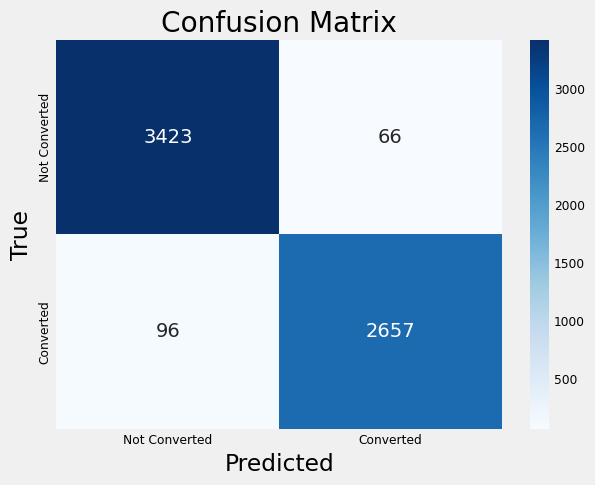

In [78]:
# Define class labels (optional)
class_labels = ['Not Converted', 'Converted']

# Create a figure and axis
fig, ax = plt.subplots()

# Create a heatmap using seaborn
sns.heatmap(randfor_down_matrix_train, annot=True, cmap='Blues', fmt='d', xticklabels=class_labels, yticklabels=class_labels, ax=ax)

# Set axis labels and title
ax.set_xlabel('Predicted')
ax.set_ylabel('True')
ax.set_title('Confusion Matrix')

# Show the plot
plt.show()

In [79]:
calculate_percentages_confusion_matrix(randfor_down_matrix_train)

True Positive Percentage: 42.56648510092919%
True Negative Percentage: 54.83819288689522%
False Positive Percentage: 1.0573534123678308%
False Negative Percentage: 1.537968599807754%
Sensitivity (True Positive Rate): 96.51289502361061%
Specificity (True Negative Rate): 98.10834049871023%


In [80]:
randfor_down_matrix_test = confusion_matrix(y_test,y_pred)

print(randfor_down_matrix_test)

[[767  86]
 [160 548]]


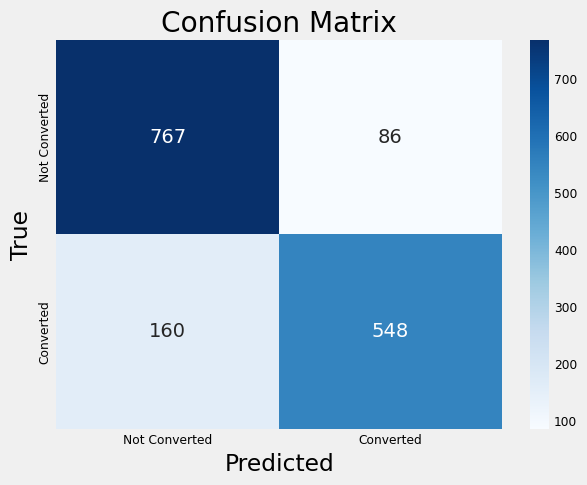

In [81]:
# Define class labels (optional)
class_labels = ['Not Converted', 'Converted']

# Create a figure and axis
fig, ax = plt.subplots()

# Create a heatmap using seaborn
sns.heatmap(randfor_down_matrix_test, annot=True, cmap='Blues', fmt='d', xticklabels=class_labels, yticklabels=class_labels, ax=ax)

# Set axis labels and title
ax.set_xlabel('Predicted')
ax.set_ylabel('True')
ax.set_title('Confusion Matrix')

# Show the plot
plt.show()

In [82]:
calculate_percentages_confusion_matrix(randfor_down_matrix_test)

True Positive Percentage: 35.10570147341448%
True Negative Percentage: 49.13516976297245%
False Positive Percentage: 5.509288917360666%
False Negative Percentage: 10.249839846252403%
Sensitivity (True Positive Rate): 77.40112994350282%
Specificity (True Negative Rate): 89.91793669402111%


##### k-fold Testing for Random Forest Up sampled

In [553]:

# Instantiate a logistic regression model
randomForestModel = RandomForestClassifier(n_estimators=100,max_features="log2",
                            max_depth=None, random_state=72,
                            min_samples_leaf=1, min_samples_split=5)

# Set the number of folds
k = 5

# Instantiate a KFold object
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Initialize an empty list to store validation accuracy scores
accuracy_scores = []
precision_scores = []
f1_scores = []
recall_scores = []
auc_scores = []

# Loop over the folds
for train_idx, val_idx in kf.split(X_train,y_train):
    # Split the data into training and validation sets
    X_train_k, y_train_k = X_train[train_idx], y_train[train_idx]
    X_val_k, y_val_k = X_train[val_idx], y_train[val_idx]
    
    # Fit the model to the training data
    randomForestModel.fit(X_train_k, y_train_k)
    
    # Make predictions on the validation set
    y_pred = randomForestModel.predict(X_val_k)
    
    # Calculate the accuracy, precision, recall, f1, auc of the model on the validation set
    accuracy = accuracy_score(y_val_k, y_pred)
    precision = precision_score(y_val_k, y_pred)
    recall = recall_score(y_val_k, y_pred)
    f1 = f1_score(y_val_k, y_pred)
    fp, tp, th = roc_curve(y_val_k, y_pred)
    
    # Append the accuracy score to the list
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    auc_scores.append(round(auc(fp, tp),5))



# Calculate the mean and standard deviation of the validation accuracy scores, precision, recall, f1, auc
mean_accuracy = sum(accuracy_scores) / k
std_accuracy = np.std(accuracy_scores)

mean_precision = sum(precision_scores) / k
std_precision = np.std(precision_scores)

mean_recall = sum(recall_scores) / k
std_recall = np.std(recall_scores)

mean_f1 = sum(f1_scores) / k
std_f1 = np.std(f1_scores)  

mean_auc = sum(auc_scores) / k
std_auc = np.std(auc_scores)


# Print the mean and standard deviation of the validation accuracy scores, precision, recall, f1, auc
print(f"Mean accuracy = {mean_accuracy:.4f} +/- {std_accuracy:.4f}")
print(f"Mean precision = {mean_precision:.4f} +/- {std_precision:.4f}")
print(f"Mean recall = {mean_recall:.4f} +/- {std_recall:.4f}")
print(f"Mean f1 = {mean_f1:.4f} +/- {std_f1:.4f}")
print(f"Mean auc = {mean_auc:.4f} +/- {std_auc:.4f}")




Mean accuracy = 0.8404 +/- 0.0100
Mean precision = 0.8368 +/- 0.0164
Mean recall = 0.7936 +/- 0.0172
Mean f1 = 0.8144 +/- 0.0099
Mean auc = 0.8356 +/- 0.0097


## Best Model

Random forest with the original dataset performs the best here


In [83]:
X = lead.drop(['Converted'], axis=1)
Y = lead['Converted']

X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.8, random_state=128)

In [84]:
randomForestModelBest = RandomForestClassifier(n_estimators=100,max_features="log2",
                            max_depth=None, random_state=96,
                            min_samples_leaf=2, min_samples_split=10)

randomForestModelBest.fit(X_train, y_train)

y_pred = randomForestModelBest.predict(X_test)
y_pred_train = randomForestModelBest.predict(X_train)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
fp, tp, th = roc_curve(y_test, y_pred)
fp1, tp1, th1 = roc_curve(y_train, y_pred_train)

print("Train Accuracy:", randomForestModelBest.score(X_train, y_train))
print("Test Accuracy:", accuracy)
print("\nTrain Precision:", precision_score(y_train, y_pred_train))
print("Test Precision:", precision)
print("\nTrain Recall:", recall_score(y_train,y_pred_train))
print("Test Recall:", recall)
print("\nTrain F1 Score:", f1_score(y_train, y_pred_train))
print("Test F1 Score:", f1)
print("\nTrain AUC:", round(auc(fp1, tp1),5))
print("Test AUC:", round(auc(fp, tp),5))


Train Accuracy: 0.876270255424334
Test Accuracy: 0.8358045030203185

Train Precision: 0.8488721804511278
Test Precision: 0.8072837632776935

Train Recall: 0.819006166122597
Test Recall: 0.7556818181818182

Train F1 Score: 0.8336717740446742
Test F1 Score: 0.780630961115187

Train AUC: 0.86508
Test AUC: 0.82099


In [86]:

# Instantiate a logistic regression model
randomForestModel = RandomForestClassifier(n_estimators=100,max_features="log2",
                            max_depth=None, random_state=96,
                            min_samples_leaf=2, min_samples_split=10)

# Set the number of folds
k = 5

# Instantiate a KFold object
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Initialize an empty list to store validation accuracy scores
accuracy_scores = []
precision_scores = []
f1_scores = []
recall_scores = []
auc_scores = []

# Loop over the folds
for train_idx, val_idx in kf.split(X_train,y_train):
    # Split the data into training and validation sets
    X_train_k, y_train_k = X_train.iloc[train_idx], y_train.iloc[train_idx]
    X_val_k, y_val_k = X_train.iloc[val_idx], y_train.iloc[val_idx]
    
    # Fit the model to the training data
    randomForestModel.fit(X_train_k, y_train_k)
    
    # Make predictions on the validation set
    y_pred = randomForestModel.predict(X_val_k)
    
    # Calculate the accuracy, precision, recall, f1, auc of the model on the validation set
    accuracy = accuracy_score(y_val_k, y_pred)
    precision = precision_score(y_val_k, y_pred)
    recall = recall_score(y_val_k, y_pred)
    f1 = f1_score(y_val_k, y_pred)
    fp, tp, th = roc_curve(y_val_k, y_pred)
    
    # Append the accuracy score to the list
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    auc_scores.append(round(auc(fp, tp),5))



# Calculate the mean and standard deviation of the validation accuracy scores, precision, recall, f1, auc
mean_accuracy = sum(accuracy_scores) / k
std_accuracy = np.std(accuracy_scores)

mean_precision = sum(precision_scores) / k
std_precision = np.std(precision_scores)

mean_recall = sum(recall_scores) / k
std_recall = np.std(recall_scores)

mean_f1 = sum(f1_scores) / k
std_f1 = np.std(f1_scores)  

mean_auc = sum(auc_scores) / k
std_auc = np.std(auc_scores)


# Print the mean and standard deviation of the validation accuracy scores, precision, recall, f1, auc
print(f"Mean accuracy = {mean_accuracy:.4f} +/- {std_accuracy:.4f}")
print(f"Mean precision = {mean_precision:.4f} +/- {std_precision:.4f}")
print(f"Mean recall = {mean_recall:.4f} +/- {std_recall:.4f}")
print(f"Mean f1 = {mean_f1:.4f} +/- {std_f1:.4f}")
print(f"Mean auc = {mean_auc:.4f} +/- {std_auc:.4f}")




Mean accuracy = 0.8267 +/- 0.0046
Mean precision = 0.7848 +/- 0.0129
Mean recall = 0.7472 +/- 0.0074
Mean f1 = 0.7655 +/- 0.0060
Mean auc = 0.8112 +/- 0.0042


### Exporting the best model

In [50]:
import joblib

In [54]:
joblib.dump(randomForestModelBest, 'random_forest_model.joblib')


['random_forest_model.joblib']